#**Mantenimiento predictivo en máquinas industriales**  



Este proyecto se enmarca dentro del campo del mantenimiento predictivo, una estrategia proactiva que utiliza datos y análisis para anticipar cuándo un equipo podría fallar, permitiendo intervenir antes de que ocurra una avería y evitando costosos tiempos de inactividad.
En particular, se aplicara ciencia de datos para predecir cuántos días de vida útil restante (Remaining Useful Life - RUL) le quedan a una máquina industrial, a partir de variables sensadas como temperatura, presión, vibraciones, entre otras, que son datos sintéticos del entorno IoT.

##**<h3>Motivación</h3>**

En la industria, los tiempos de inactividad no planificados por fallas pueden generar costos operativos elevados. Aplicar técnicas de mantenimiento predictivo basadas en datos permite anticipar el fallo de componentes, reducir pérdidas y los costos de mantenimiento correctivo y optimizar la planificación del mantenimiento permitiendo tomar decisiones proactivas.

##**<h3>Audiencia</h3>**

Este proyecto está dirigido a equipos de mantenimiento, ingenieros industriales, analistas de datos y tomadores de decisión en industrias que buscan soluciones inteligentes de mantenimiento para mejorar la gestión de activos industriales.

##**<h3>Contexto Comercial</h3>**

Las fallas inesperadas en maquinarias industriales generan altos costos, tanto por interrupciones en la producción como por reparaciones urgentes.
Adoptar estrategias de mantenimiento predictivo permite planificar intervenciones antes de que ocurran fallos, maximizando el tiempo de operación y reduciendo el impacto económico de los paros no programados.

##**<h3>Contexto Analítico</h3>**

El proyecto utiliza un conjunto de datos sintéticos del entorno IoT industrial, que simula variables recolectadas por sensores en equipos reales. Se aplican técnicas de ciencia de datos para entrenar un modelo de regresión supervisada que predice la Remaining Useful Life (RUL) de cada máquina, es decir, los días restantes de vida util.

Esto permite construir un sistema inteligente de mantenimiento predictivo que facilite la toma de decisiones proactivas.



**<h3>Dataset</h3>** https://raw.githubusercontent.com/lucasresto/Industrial-IoT/refs/heads/master/factory_sensor_simulator_2040.csv

**<h3>Presentación ejecutiva</h3>**  
https://github.com/lucasresto/Industrial-IoT/blob/f3c1a52949bac55915aeb866e5c46f10394735e1/Presentacion%20Ejecutiva%20Industrial-IoT.pdf

##**<h3>Preguntas/Hipótesis a Resolver mediante el Análisis de Datos</h3>**

- ¿Qué variables tienen mayor influencia en la predicción de la vida útil restante de una máquina?  

- ¿Es posible construir un modelo que prediga con precisión la RUL de los equipos industriales?

- ¿Qué tan anticipadamente se pueden detectar fallas con la información disponible?

- ¿Cómo varía la RUL entre distintos tipos de máquinas o condiciones de operación?

- ¿Existen patrones en las condiciones operativas que permitan predecir fallas con suficiente antelación?

##**<h3>Objetivo del Proyecto</h3>**

El objetivo de este proyecto es desarrollar un modelo predictivo capaz de estimar la vida útil restante (Remaining Useful Life - RUL) de maquinarias industriales, utilizando datos generados por sensores.
Esto permitirá implementar una estrategia de mantenimiento predictivo, anticipando fallas potenciales y optimizando la planificación de las tareas de mantenimiento.
El modelo se basa en técnicas de aprendizaje supervisado aplicadas a datos simulados de un entorno industrial IoT.

##**<h3>Objetivos Específicos</h3>**

Exploración y limpieza de datos:  

- Identificar y manejar valores nulos, outliers y posibles inconsistencias en los datos sensados.  
- Realizar un análisis exploratorio de datos (EDA) para comprender la distribución de la variable objetivo (Remaining_Useful_Life_days) y las relaciones entre las variables de sensores.  
- Visualizar tendencias en el deterioro de los equipos a lo largo del tiempo.  






##**<h3>Resultados Esperados</h3>**

Desarrollo de un modelo de machine learning capaz de predecir la vida útil restante con R^2 de 0,9.  

Un sistema de mantenimiento predictivo que permita anticiparse a las fallas con varios días de antelación, optimizando recursos técnicos y económicos.  

Un informe técnico con visualizaciones e insights sobre qué condiciones operativas aceleran el desgaste de los equipos.

##**<h3>Conclusiones</h3>**

Este proyecto demuestra cómo las técnicas de ciencia de datos pueden aplicarse de forma efectiva en el sector industrial para mejorar el mantenimiento de activos.  
Mediante la predicción del Remaining Useful Life (RUL), es posible tomar decisiones preventivas, reducir fallas imprevistas y aumentar la disponibilidad operativa de las máquinas.  
La solución propuesta puede escalarse a entornos reales y adaptarse a distintos tipos de maquinaria, convirtiéndose en un recurso valioso para la transformación digital de los procesos industriales.



##**<h3>Variable objetivo:</h3>**  **(Remaining_Useful_Life_days)**

# **<h3>Lectura inicial de datos</h3>**  

---

## **Librerias necesarias para el analisis de datos**

In [ ]:
# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ajuste de visualizaciones y estilo
%matplotlib inline
sns.set(style="whitegrid")

# Suprimir las advertencias no deseadas para mantener la salida limpia
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Leer el dataset
url = ('https://raw.githubusercontent.com/lucasresto/Industrial-IoT/refs/heads/master/factory_sensor_simulator_2040.csv')

# Cargar el archivo CSV
df = pd.read_csv(url)

In [ ]:
# Dimensiones del dataset
df.shape

(500000, 22)

In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Machine_ID                  500000 non-null  object 
 1   Machine_Type                500000 non-null  object 
 2   Installation_Year           500000 non-null  int64  
 3   Operational_Hours           500000 non-null  int64  
 4   Temperature_C               500000 non-null  float64
 5   Vibration_mms               500000 non-null  float64
 6   Sound_dB                    500000 non-null  float64
 7   Oil_Level_pct               500000 non-null  float64
 8   Coolant_Level_pct           500000 non-null  float64
 9   Power_Consumption_kW        500000 non-null  float64
 10  Last_Maintenance_Days_Ago   500000 non-null  int64  
 11  Maintenance_History_Count   500000 non-null  int64  
 12  Failure_History_Count       500000 non-null  int64  
 13  AI_Supervision

In [ ]:
# Mostrar las primeras filas
df.head(10)

Machine_ID           Machine_Type  Installation_Year  Operational_Hours  \
0  MC_000000                  Mixer               2027              81769   
1  MC_000001     Industrial_Chiller               2032              74966   
2  MC_000002         Pick_and_Place               2003              94006   
3  MC_000003          Vision_System               2007              76637   
4  MC_000004         Shuttle_System               2016              20870   
5  MC_000005                Labeler               2001              69956   
6  MC_000006  Automated_Screwdriver               2025               2578   
7  MC_000007  Automated_Screwdriver               2005              39895   
8  MC_000008         Shrink_Wrapper               2020              19992   
9  MC_000009         Shrink_Wrapper               2029              13151   

   Temperature_C  Vibration_mms  Sound_dB  Oil_Level_pct  Coolant_Level_pct  \
0          73.43          12.78     83.72          36.76              68.74   
1          58.32          14.99     77.04         100.00              62.13   
2          49.63          23.78     69.08          42.96              35.96   
3          63.73          12.38     85.58          94.90              48.94   
4          42.77           4.42     96.72          47.56              53.78   
5          53.58          14.31     54.79          39.97              85.49   
6          62.44           8.42     97.15          80.57              19.88   
7          27.28          16.09     38.66          87.98              38.66   
8          69.31           9.69     82.15          62.04              41.63   
9          69.18          13.10     84.82          38.36              73.15   

   Power_Consumption_kW  ...  Failure_History_Count  AI_Supervision  \
0                 84.95  ...                      5            True   
1                154.61  ...                      2            True   
2                 51.90  ...                      1            True   
3                 75.61  ...                      1           False   
4                224.93  ...                      2           False   
5                105.33  ...                      1           False   
6                207.15  ...                      2           False   
7                122.53  ...                      0           False   
8                145.71  ...                      3            True   
9                178.91  ...                      1           False   

   Error_Codes_Last_30_Days  Remaining_Useful_Life_days  \
0                         3                       162.0   
1                         4                       147.0   
2                         6                         0.0   
3                         4                       161.0   
4                         1                       765.0   
5                         0                       163.0   
6                         1                       908.0   
7                         6                       467.0   
8                         4                       794.0   
9                         6                       925.0   

   Failure_Within_7_Days  Laser_Intensity  Hydraulic_Pressure_bar  \
0                  False              NaN                     NaN   
1                  False              NaN                     NaN   
2                   True              NaN                     NaN   
3                  False              NaN                     NaN   
4                  False              NaN                     NaN   
5                  False              NaN                     NaN   
6                  False              NaN                     NaN   
7                  False              NaN                     NaN   
8                  False              NaN                     NaN   
9                  False              NaN                     NaN   

   Coolant_Flow_L_min  Heat_Index  AI_Override_Events  
0                 NaN         NaN   

In [ ]:
# Mostrar instancias aleatoreamente
df.sample(10)

Machine_ID        Machine_Type  Installation_Year  Operational_Hours  \
438506  MC_438506            CNC_Mill               2015              88456   
461294  MC_461294               Dryer               2028              67683   
400436  MC_400436    Injection_Molder               2029              82702   
166685  MC_166685           CNC_Lathe               2025              47571   
197173  MC_197173  Industrial_Chiller               2017               6561   
385977  MC_385977      Shuttle_System               2020              94187   
446802  MC_446802      Heat_Exchanger               2004              46512   
194511  MC_194511       Vacuum_Packer               2038              76314   
38981   MC_038981          3D_Printer               2037               1907   
430516  MC_430516    Valve_Controller               2032                117   

        Temperature_C  Vibration_mms  Sound_dB  Oil_Level_pct  \
438506          37.58           7.04     75.17          44.52   
461294          40.61           6.86     77.21          67.46   
400436          68.11          20.75     68.93          54.71   
166685          63.40          19.03     63.81          57.57   
197173          52.32           5.83     69.75          54.50   
385977          64.64          10.73     76.89          66.58   
446802          44.06          19.22     85.51          49.26   
194511          62.79           1.89     72.52          77.08   
38981           57.56          12.18     74.42          74.53   
430516          44.98           5.85     88.17         100.00   

        Coolant_Level_pct  Power_Consumption_kW  ...  Failure_History_Count  \
438506              38.86                -12.44  ...                      3   
461294              82.09                170.22  ...                      1   
400436               5.58                125.81  ...                      4   
166685              40.65                109.82  ...                      2   
197173              41.03                116.79  ...                      7   
385977              50.20                142.30  ...                      3   
446802              18.40                311.29  ...                      1   
194511              69.69                161.94  ...                      2   
38981               36.22                 32.47  ...                      1   
430516              60.45                230.80  ...                      2   

        AI_Supervision  Error_Codes_Last_30_Days  Remaining_Useful_Life_days  \
438506           False                         4                       137.0   
461294           False                         3                       319.0   
400436           False                         1                       121.0   
166685           False                         0                       445.0   
197173            True                         3                       851.0   
385977           False                         2                        60.0   
446802            True                         4                       368.0   
194511           False                         5                       216.0   
38981            False                         5                       944.0   
430516            True                         3                      1014.0   

        Failure_Within_7_Days  Laser_Intensity  Hydraulic_Pressure_bar  \
438506                  False              NaN                     NaN   
461294                  False              NaN                     NaN   
400436                  False              NaN                  134.58   
166685                  False              NaN                     NaN   
197173                  False              NaN                     NaN   
385977                  False              NaN                     NaN   
446802                  False              NaN                     NaN   
194511                  False              NaN                     NaN   
3898

In [ ]:
# Mostrar las ultimas filas
df.tail()

Machine_ID        Machine_Type  Installation_Year  Operational_Hours  \
499995  MC_499995       Vacuum_Packer               2011              14425   
499996  MC_499996       Conveyor_Belt               2003              75501   
499997  MC_499997                 CMM               2039              19855   
499998  MC_499998               Dryer               2035              86823   
499999  MC_499999  Industrial_Chiller               2021              52505   

        Temperature_C  Vibration_mms  Sound_dB  Oil_Level_pct  \
499995          65.42          16.50     81.95          59.21   
499996          44.83          12.88     64.94          73.69   
499997          37.26          11.46     70.70          70.70   
499998          67.72          16.76     77.45          97.00   
499999          46.01           8.94     67.88          51.11   

        Coolant_Level_pct  Power_Consumption_kW  ...  Failure_History_Count  \
499995              73.67                255.87  ...                      3   
499996              29.25                198.37  ...                      1   
499997              49.04                156.59  ...                      2   
499998              15.40                132.33  ...                      2   
499999              31.90                138.69  ...                      1   

        AI_Supervision  Error_Codes_Last_30_Days  Remaining_Useful_Life_days  \
499995           False                         0                       820.0   
499996           False                         4                        34.0   
499997           False                         4                       815.0   
499998            True                         0                        99.0   
499999           False                         4                       489.0   

        Failure_Within_7_Days  Laser_Intensity  Hydraulic_Pressure_bar  \
499995                  False              NaN                     NaN   
499996                  False              NaN                     NaN   
499997                  False              NaN                     NaN   
499998                  False              NaN                     NaN   
499999                  False              NaN                     NaN   

        Coolant_Flow_L_min  Heat_Index  AI_Override_Events  
499995                 NaN         NaN                   0  
499996                 NaN         NaN                   0  
499997                 NaN         NaN                   0  
499998                 NaN         NaN                   2  
499999               41.09         NaN                   0  

[5 rows x 22 columns]

##**<h3>Resumen estadistico</h3>**

In [ ]:
df.describe().T

count          mean           std      min  \
Installation_Year           500000.0   2019.962360     11.829812  2000.00   
Operational_Hours           500000.0  50012.424764  28861.849078     0.00   
Temperature_C               500000.0     59.997682     14.986973   -15.73   
Vibration_mms               500000.0      9.991140      4.999530   -17.82   
Sound_dB                    500000.0     75.003477      9.990791    23.65   
Oil_Level_pct               500000.0     69.456568     18.847444     0.00   
Coolant_Level_pct           500000.0     64.114159     23.152998     0.00   
Power_Consumption_kW        500000.0    149.922161     79.955937  -222.74   
Last_Maintenance_Days_Ago   500000.0    182.257866    105.552537     0.00   
Maintenance_History_Count   500000.0      5.003128      2.238043     0.00   
Failure_History_Count       500000.0      2.000588      1.413087     0.00   
Error_Codes_Last_30_Days    500000.0      3.000840      1.730541     0.00   
Remaining_Useful_Life_days  500000.0    452.422338    288.971269     0.00   
Laser_Intensity              15156.0     74.995513     10.035133    34.97   
Hydraulic_Pressure_bar       30340.0    119.917514     15.017048    52.68   
Coolant_Flow_L_min           45624.0     39.984794      9.989653    -0.16   
Heat_Index                   45214.0    499.760966     50.012057   296.44   
AI_Override_Events          500000.0      0.602098      1.203647     0.00   

                                 25%       50%         75%        max  
Installation_Year            2010.00   2020.00   2030.0000    2040.00  
Operational_Hours           25055.00  49973.00  74995.0000  100000.00  
Temperature_C                  49.89     60.00     70.0500     127.33  
Vibration_mms                   6.62     10.00     13.3600      32.47  
Sound_dB                       68.27     75.00     81.7300     120.70  
Oil_Level_pct                  56.54     70.03     83.5400     100.00  
Coolant_Level_pct              48.13     65.01     81.8400     100.00  
Power_Consumption_kW           96.09    149.95    203.9000     544.20  
Last_Maintenance_Days_Ago      91.00    182.00    274.0000     365.00  
Maintenance_History_Count       3.00      5.00      6.0000      18.00  
Failure_History_Count           1.00      2.00      3.0000      12.00  
Error_Codes_Last_30_Days        2.00      3.00      4.0000      13.00  
Remaining_Useful_Life_days    200.00    451.00    700.0000    1133.00  
Laser_Intensity                68.25     74.95     81.6825     114.32  
Hydraulic_Pressure_bar        109.82    119.86    130.0725     185.38  
Coolant_Flow_L_min             33.20     40.03     46.7500      80.79  
Heat_Index                    465.94    499.77    533.3075     694.17  
AI_Override_Events              0.00      0.00      1.0000      11.00

In [ ]:
df.describe(include=['object']).T

count  unique        top   freq
Machine_ID    500000  500000  MC_499983      1
Machine_Type  500000      33        AGV  15409

In [ ]:
df.select_dtypes(include=['object']).apply(pd.unique)

Machine_ID      [MC_000000, MC_000001, MC_000002, MC_000003, M...
Machine_Type    [Mixer, Industrial_Chiller, Pick_and_Place, Vi...
dtype: object

In [ ]:
df.columns

Index(['Machine_ID', 'Machine_Type', 'Installation_Year', 'Operational_Hours',
       'Temperature_C', 'Vibration_mms', 'Sound_dB', 'Oil_Level_pct',
       'Coolant_Level_pct', 'Power_Consumption_kW',
       'Last_Maintenance_Days_Ago', 'Maintenance_History_Count',
       'Failure_History_Count', 'AI_Supervision', 'Error_Codes_Last_30_Days',
       'Remaining_Useful_Life_days', 'Failure_Within_7_Days',
       'Laser_Intensity', 'Hydraulic_Pressure_bar', 'Coolant_Flow_L_min',
       'Heat_Index', 'AI_Override_Events'],
      dtype='object')

##**<h3>Descripcion de las variables</h3>**  

---

Machine_ID → ID_Máquina. Identificador único de la máquina.

Machine_Type → Tipo_Máquina. Categoría o modelo de la máquina.

Installation_Year → Año_Instalación. Año en que se instaló la máquina.

Operational_Hours → Horas_Operativas. Cantidad total de horas en funcionamiento.

Temperature_C → Temperatura_C. Temperatura actual de la máquina en grados Celsius.

Vibration_mms → Vibración_mm/s. Nivel de vibración medido en milímetros por segundo.

Sound_dB → Sonido_dB. Nivel de sonido emitido por la máquina en decibelios.

Oil_Level_pct → Nivel_Aceite_pct. Porcentaje actual del nivel de aceite.

Coolant_Level_pct → Nivel_Refrigerante_pct. Porcentaje actual del nivel de refrigerante.

Power_Consumption_kW → Consumo_Energía_kW. Consumo eléctrico en kilovatios.

Last_Maintenance_Days_Ago → Días_Desde_Ultimo_Mantenimiento. Días desde el último mantenimiento realizado.

Maintenance_History_Count → Cantidad_Mantenimientos_Históricos. Número total de mantenimientos anteriores.

Failure_History_Count → Cantidad_Fallas_Históricas. Cantidad de fallas que ha tenido la máquina.

AI_Supervision → Supervisión_IA. Indica si la máquina está bajo supervisión de inteligencia artificial.

Error_Codes_Last_30_Days → Códigos_Error_Ultimos_30_Días. Cantidad de códigos de error registrados en los últimos 30 días.

Remaining_Useful_Life_days → Vida_Útil_Restante_Días. Días estimados de vida útil restante.

Failure_Within_7_Days → Falla_En_Siguientes_7_Días. Indica si se espera una falla en los próximos 7 días.

Laser_Intensity → Intensidad_Láser. Potencia o nivel de intensidad del láser en la máquina.

Hydraulic_Pressure_bar → Presión_Hidráulica_bar. Presión hidráulica medida en bares.

Coolant_Flow_L_min → Flujo_Refrigerante_Litros_Min. Flujo de refrigerante en litros por minuto.

Heat_Index → Índice_Calor. Índice que combina temperatura y condiciones internas de la máquina.

AI_Override_Events → Eventos_Intervención_IA. Cantidad de veces que la inteligencia artificial intervino manualmente.

#**<h2>Limpieza y transformación de datos</h2>**  

---

##<h3>Verificación de Valores Nulos:</h3>

In [ ]:
df.isnull().sum()

Machine_ID                         0
Machine_Type                       0
Installation_Year                  0
Operational_Hours                  0
Temperature_C                      0
Vibration_mms                      0
Sound_dB                           0
Oil_Level_pct                      0
Coolant_Level_pct                  0
Power_Consumption_kW               0
Last_Maintenance_Days_Ago          0
Maintenance_History_Count          0
Failure_History_Count              0
AI_Supervision                     0
Error_Codes_Last_30_Days           0
Remaining_Useful_Life_days         0
Failure_Within_7_Days              0
Laser_Intensity               484844
Hydraulic_Pressure_bar        469660
Coolant_Flow_L_min            454376
Heat_Index                    454786
AI_Override_Events                 0
dtype: int64

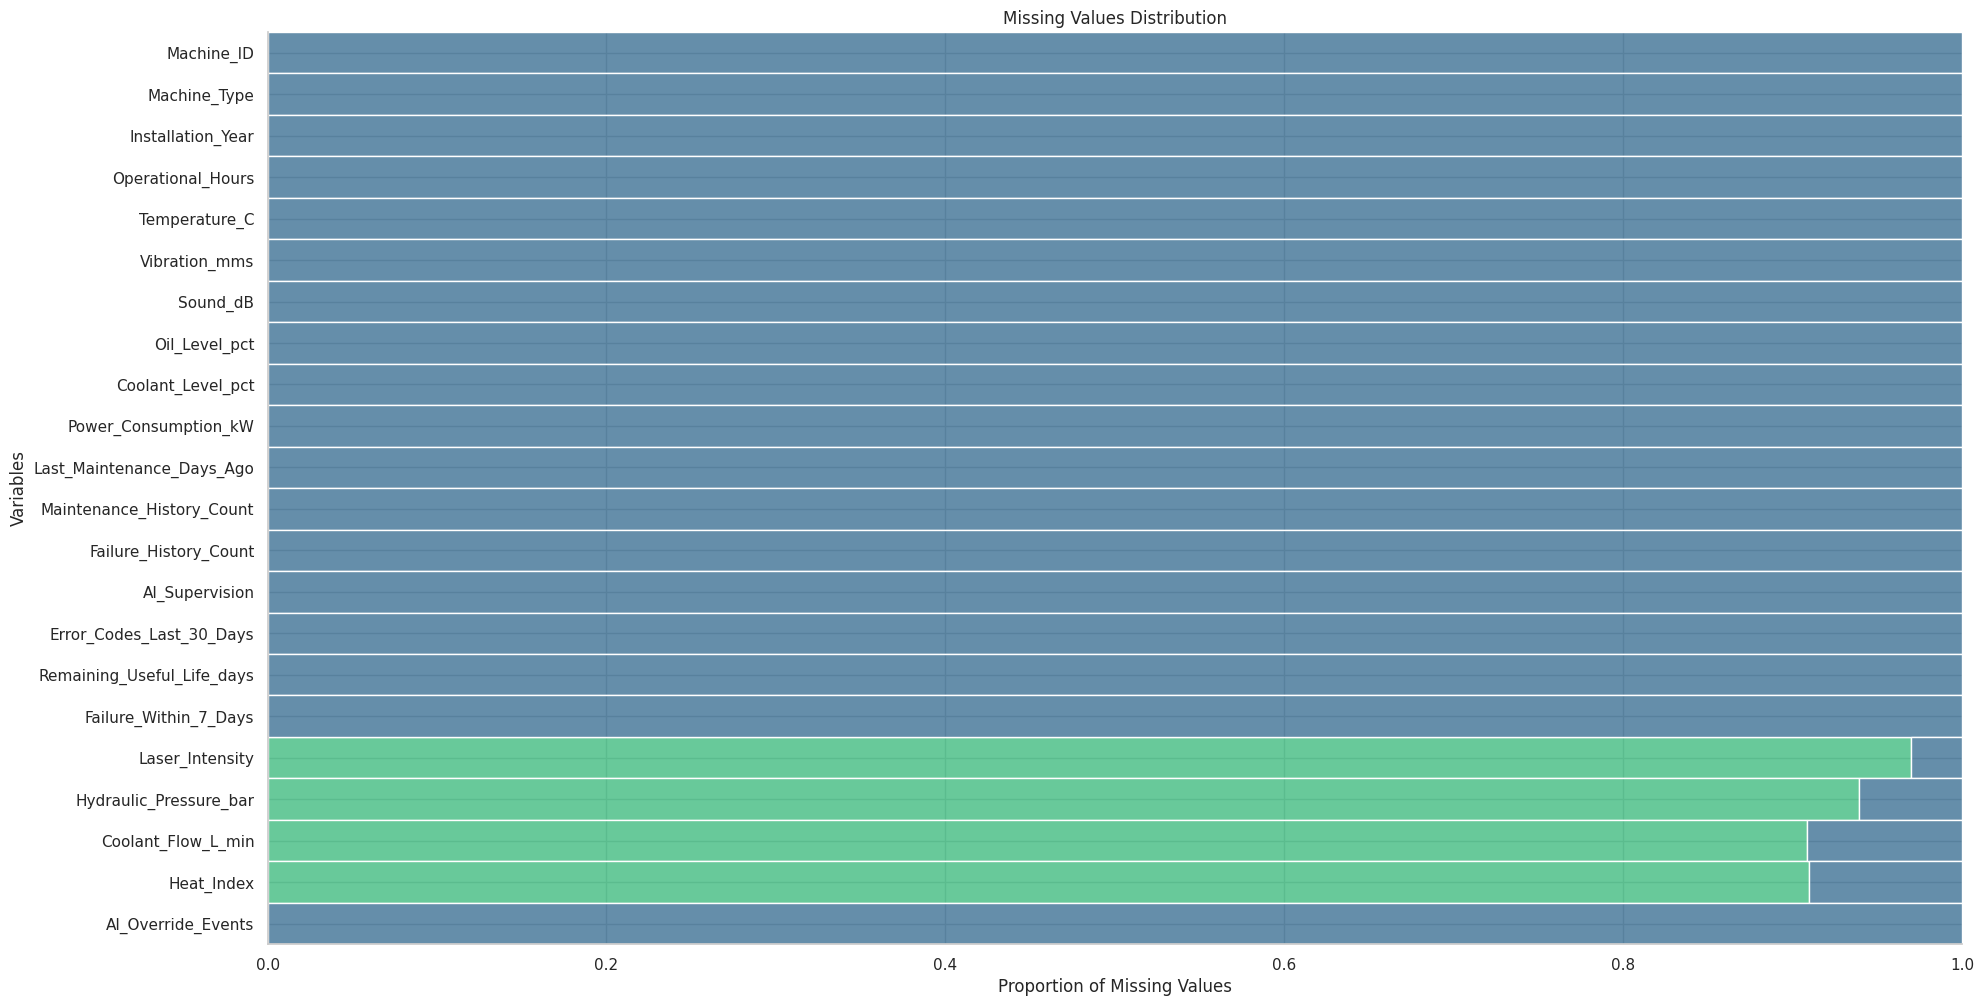

In [ ]:
# Graficamos para ver la distribución de los nulos
(dfgraf:= df.isnull().melt()).pipe(
    lambda df: (
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2,         # Reducir el aspect ratio para que sea más ancho
            height=10,        # Ajustar la altura del gráfico
            palette='viridis',# Cambiar la paleta de colores
            legend=False       # Desactivar la leyenda para ahorrar espacio
        )
    )
)

# Añadir etiquetas
plt.title('Missing Values Distribution')
plt.xlabel('Proportion of Missing Values')
plt.ylabel('Variables')
plt.show()

In [ ]:
# Resumimos todo con un contador de valores nulos por cada variable
nulos_por_variable = df.isnull()
cantidad_nulos_por_variable = nulos_por_variable.sum() # Sumamos los valores booleanos para obtener la cantidad de nulos por variable
variables_con_nulos = cantidad_nulos_por_variable[cantidad_nulos_por_variable > 0] # Filtramos solo las variables con al menos un valor nulo
lista_variables_con_nulos = variables_con_nulos.index.tolist() # Convertimos a lista

for variable in lista_variables_con_nulos:
    cantidad_nulos = cantidad_nulos_por_variable[variable]
    porcentaje_nulos = (cantidad_nulos / len(df)) * 100
    print(f"Variable: {variable}, Cantidad de Nulos: {cantidad_nulos}, Porcentaje: {porcentaje_nulos:.2f}%")

Variable: Laser_Intensity, Cantidad de Nulos: 484844, Porcentaje: 96.97%
Variable: Hydraulic_Pressure_bar, Cantidad de Nulos: 469660, Porcentaje: 93.93%
Variable: Coolant_Flow_L_min, Cantidad de Nulos: 454376, Porcentaje: 90.88%
Variable: Heat_Index, Cantidad de Nulos: 454786, Porcentaje: 90.96%


Laser_Intensity              NaN
Hydraulic_Pressure_bar       NaN
Coolant_Flow_L_min           NaN
Heat_Index                   NaN
Remaining_Useful_Life_days   NaN
Name: Remaining_Useful_Life_days, dtype: float64


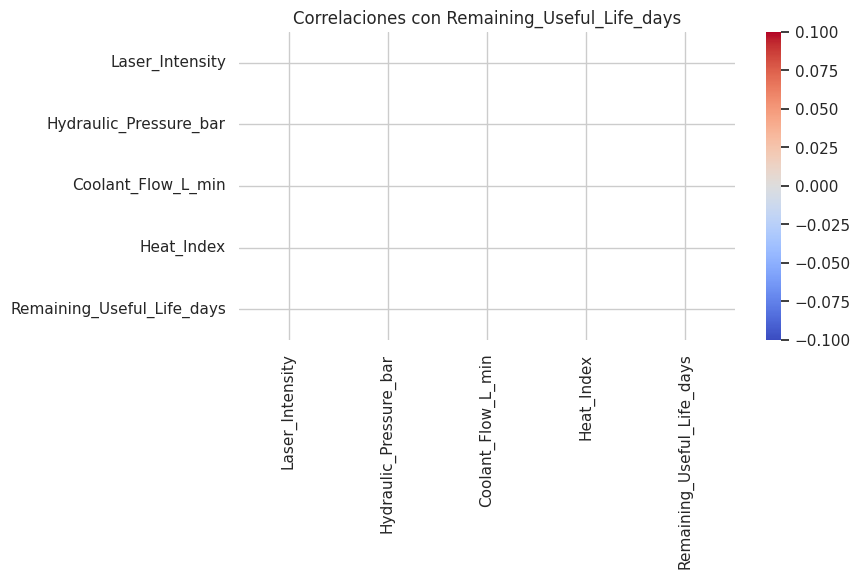

In [ ]:
# Lista de las columnas con muchos nulos
cols_to_test = ['Laser_Intensity', 'Hydraulic_Pressure_bar', 'Coolant_Flow_L_min', 'Heat_Index']

# Subset solo con la variable objetivo y las 4 columnas
subset = df[cols_to_test + ['Remaining_Useful_Life_days']]

# Eliminar filas con nulos en esas columnas
subset_clean = subset.dropna()

# Ver correlación numérica
correlation_matrix = subset_clean.corr(numeric_only=True)
print(correlation_matrix['Remaining_Useful_Life_days'].sort_values(ascending=False))

# Heatmap visual
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones con Remaining_Useful_Life_days')
plt.show()


**<h3>Interpretación del gráfico</h3>**

Todas las correlaciones entre las variables con muchos nulos (Laser_Intensity, Hydraulic_Pressure_bar, Coolant_Flow_L_min, Heat_Index) y la variable objetivo Remaining_Useful_Life_days son prácticamente 0.  

Esto significa que no tienen una relación lineal significativa con la variable objetivo.

Se procede a eliminar estas 3 variables (Laser_Intensity, Coolant_Flow_L_min, Heat_Index)
Motivo: Muy alta proporción de nulos y bajo aporte exclusivo (Heat_Index se puede reemplazar con Temperature_C y otras).

In [ ]:
# Crear una copia sin las 3 columnas con valores nulos
df_1 = df.drop(columns=['Laser_Intensity', 'Coolant_Flow_L_min', 'Heat_Index'])

# Ahora se tiene:
# - df → sigue con todas las columnas originales
# - df_1 → es una copia sin esas tres columnas ['Laser_Intensity', 'Coolant_Flow_L_min', 'Heat_Index']


In [ ]:
# Comprobacion de las columnas eliminadas
df_1.columns

Index(['Machine_ID', 'Machine_Type', 'Installation_Year', 'Operational_Hours',
       'Temperature_C', 'Vibration_mms', 'Sound_dB', 'Oil_Level_pct',
       'Coolant_Level_pct', 'Power_Consumption_kW',
       'Last_Maintenance_Days_Ago', 'Maintenance_History_Count',
       'Failure_History_Count', 'AI_Supervision', 'Error_Codes_Last_30_Days',
       'Remaining_Useful_Life_days', 'Failure_Within_7_Days',
       'Hydraulic_Pressure_bar', 'AI_Override_Events'],
      dtype='object')

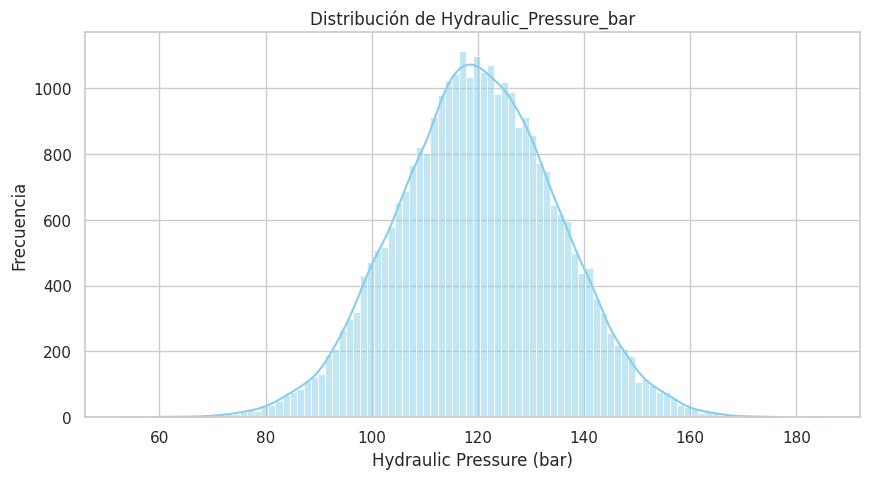

In [ ]:
# Distribución de la variable (Hydraulic_Pressure_bar)
plt.figure(figsize=(10, 5))
sns.histplot(df['Hydraulic_Pressure_bar'], kde=True, bins=100, color='skyblue')
plt.title('Distribución de Hydraulic_Pressure_bar')
plt.xlabel('Hydraulic Pressure (bar)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
# Estadísticas
print(df['Hydraulic_Pressure_bar'].describe())

# Porcentaje de nulos
nulos = df_1['Hydraulic_Pressure_bar'].isnull().mean() * 100
print(f"Porcentaje de valores nulos: {nulos:.2f}%")


count    30340.000000
mean       119.917514
std         15.017048
min         52.680000
25%        109.820000
50%        119.860000
75%        130.072500
max        185.380000
Name: Hydraulic_Pressure_bar, dtype: float64
Porcentaje de valores nulos: 93.93%


La variable 'Hydraulic_Pressure_bar' tiene una distribucion normal centrada alrededor de 120 bar, no hay outliers evidentes ni valores negativos. Por ende, es una variable simetrica, asi que se procede a usar la mediana para imputar, ya que es robusta y te protege de cualquier leve asimetría sin distorsionar la distribución original

In [ ]:
# Imputar con mediana en 'Hydraulic_Pressure_bar'
df_1['Hydraulic_Pressure_bar'].fillna(df_1['Hydraulic_Pressure_bar'].median(), inplace=True)

In [ ]:
# Verificación de que no hay valores nulos
print("Valores nulos después de la imputación:")
df_1.isnull().sum()

Valores nulos después de la imputación:


Machine_ID                    0
Machine_Type                  0
Installation_Year             0
Operational_Hours             0
Temperature_C                 0
Vibration_mms                 0
Sound_dB                      0
Oil_Level_pct                 0
Coolant_Level_pct             0
Power_Consumption_kW          0
Last_Maintenance_Days_Ago     0
Maintenance_History_Count     0
Failure_History_Count         0
AI_Supervision                0
Error_Codes_Last_30_Days      0
Remaining_Useful_Life_days    0
Failure_Within_7_Days         0
Hydraulic_Pressure_bar        0
AI_Override_Events            0
dtype: int64

##**<h3>Verificación de Valores duplicados</h3>**  

---

In [ ]:
df_1.duplicated().sum()

np.int64(0)

**No existen valores duplicados**

##**<h3>Tranformación (Errores de tipeo)</h3>**  

---

In [ ]:
# Lista de columnas categóricas
columnas_categoricas = [
    'Machine_ID', 'Machine_Type'
]

# Mostrar valores únicos de cada columna categórica
for columna in columnas_categoricas:
    valores_unicos = df_1[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")

Valores únicos en 'Machine_ID': ['MC_000000' 'MC_000001' 'MC_000002' ... 'MC_499997' 'MC_499998'
 'MC_499999']
Valores únicos en 'Machine_Type': ['Mixer' 'Industrial_Chiller' 'Pick_and_Place' 'Vision_System'
 'Shuttle_System' 'Labeler' 'Automated_Screwdriver' 'Shrink_Wrapper'
 'Laser_Cutter' 'CMM' 'CNC_Lathe' 'Dryer' 'Valve_Controller' 'Furnace'
 'Carton_Former' 'Hydraulic_Press' 'Compressor' 'AGV' 'Robot_Arm'
 'Conveyor_Belt' 'Forklift_Electric' 'Press_Brake' 'Boiler'
 'Vacuum_Packer' 'XRay_Inspector' 'Crane' '3D_Printer' 'Palletizer'
 'Grinder' 'CNC_Mill' 'Injection_Molder' 'Heat_Exchanger' 'Pump']


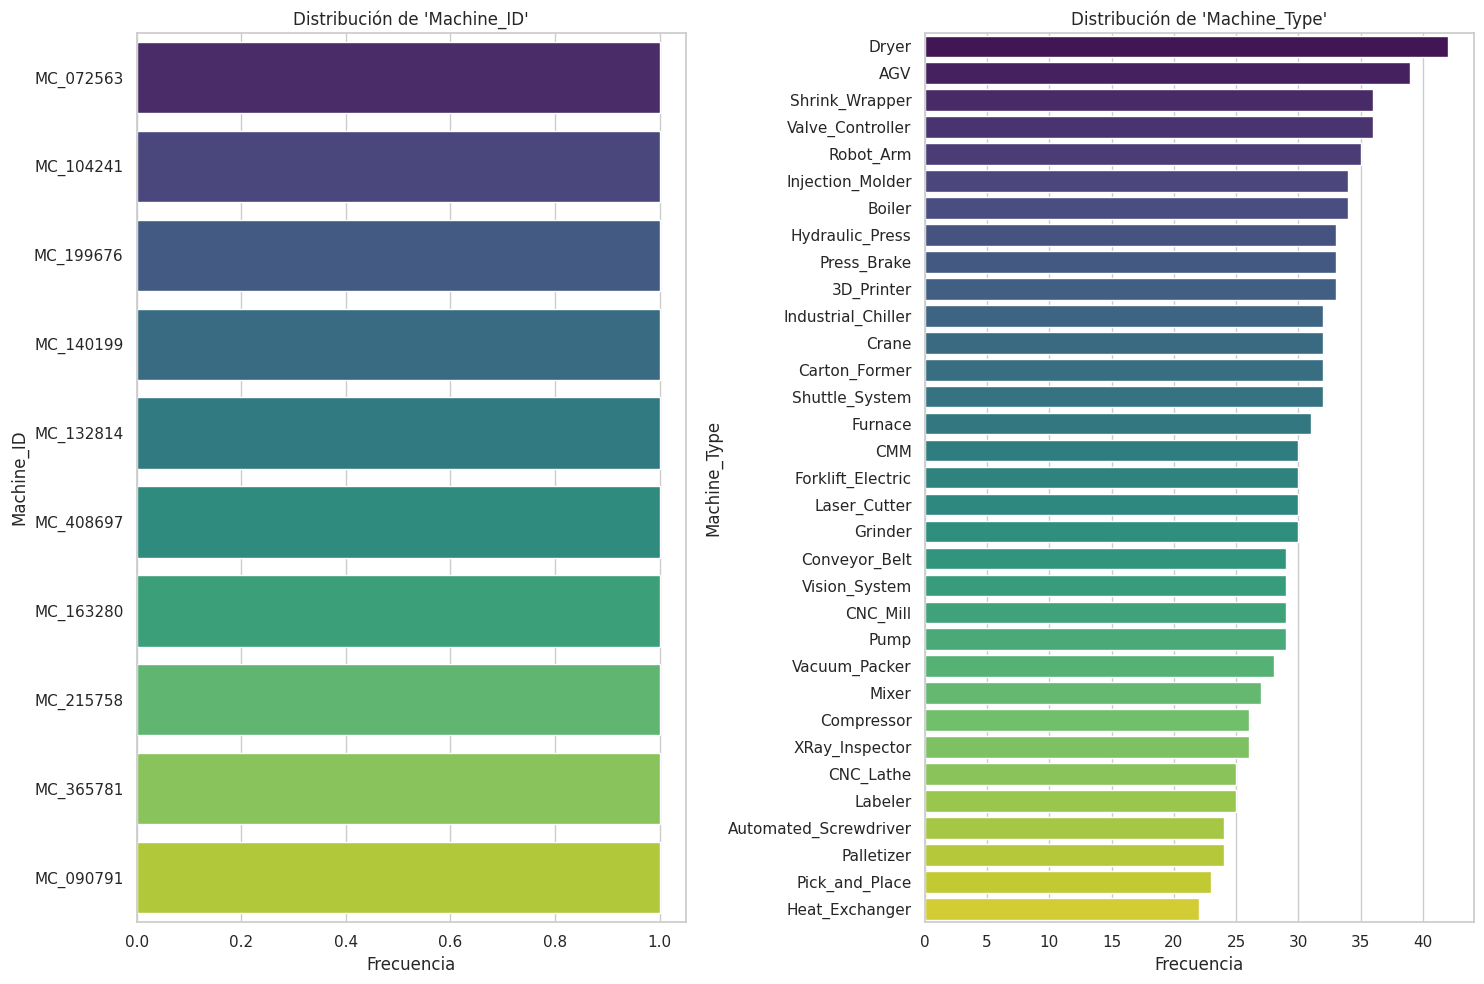

In [ ]:
# Lista de columnas categóricas
columnas_categoricas = ['Machine_ID', 'Machine_Type']

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Graficar la distribución de valores únicos en cada columna categórica
for i, columna in enumerate(columnas_categoricas):
    if columna in df_1.columns:
        df_1_muestra = df_1.sample(n=1000, random_state=42)

        # Solo limitar a top 10 si la columna es 'Machine_ID'
        if columna == 'Machine_ID':
            counts = df_1_muestra[columna].value_counts().head(10)
        else:
            counts = df_1_muestra[columna].value_counts()

        sns.barplot(x=counts.values, y=counts.index, ax=axes[i], palette="viridis")
        axes[i].set_title(f"Distribución de '{columna}'")
        axes[i].set_xlabel("Frecuencia")
        axes[i].set_ylabel(columna)

plt.tight_layout()
plt.show()


**No existen errores de escritura**

In [ ]:
# Se realizara la transformacion de las variables categoricas utilizando LabelEncoder

from sklearn.preprocessing import LabelEncoder

columnas_categoricas = ['Machine_ID', 'Machine_Type']

# Crear un diccionario para guardar los codificadores por columna (útil para luego transformar test)
label_encoders = {}

for col in columnas_categoricas:
    le = LabelEncoder()
    df_1[col + '_cod'] = le.fit_transform(df_1[col])
    label_encoders[col] = le  # guardar el encoder por si se necesita para transformar test

# Ahora df_1 tiene:
# 'Machine_ID_cod' y 'Machine_Type_cod' con la versión numérica de esas columnas.



##**<h3>Tratamiento de valores outliers</h3>**   

---

In [ ]:
df_1.select_dtypes(include='number').columns

Index(['Installation_Year', 'Operational_Hours', 'Temperature_C',
       'Vibration_mms', 'Sound_dB', 'Oil_Level_pct', 'Coolant_Level_pct',
       'Power_Consumption_kW', 'Last_Maintenance_Days_Ago',
       'Maintenance_History_Count', 'Failure_History_Count',
       'Error_Codes_Last_30_Days', 'Remaining_Useful_Life_days',
       'Hydraulic_Pressure_bar', 'AI_Override_Events', 'Machine_ID_cod',
       'Machine_Type_cod'],
      dtype='object')

In [ ]:
# Columnas numéricas a analizar
columnas_numericas = [
   'Installation_Year', 'Operational_Hours', 'Temperature_C',
       'Vibration_mms', 'Sound_dB', 'Oil_Level_pct', 'Coolant_Level_pct',
       'Power_Consumption_kW', 'Last_Maintenance_Days_Ago',
       'Maintenance_History_Count', 'Failure_History_Count',
       'Error_Codes_Last_30_Days', 'Remaining_Useful_Life_days',
       'Hydraulic_Pressure_bar', 'AI_Override_Events'
]

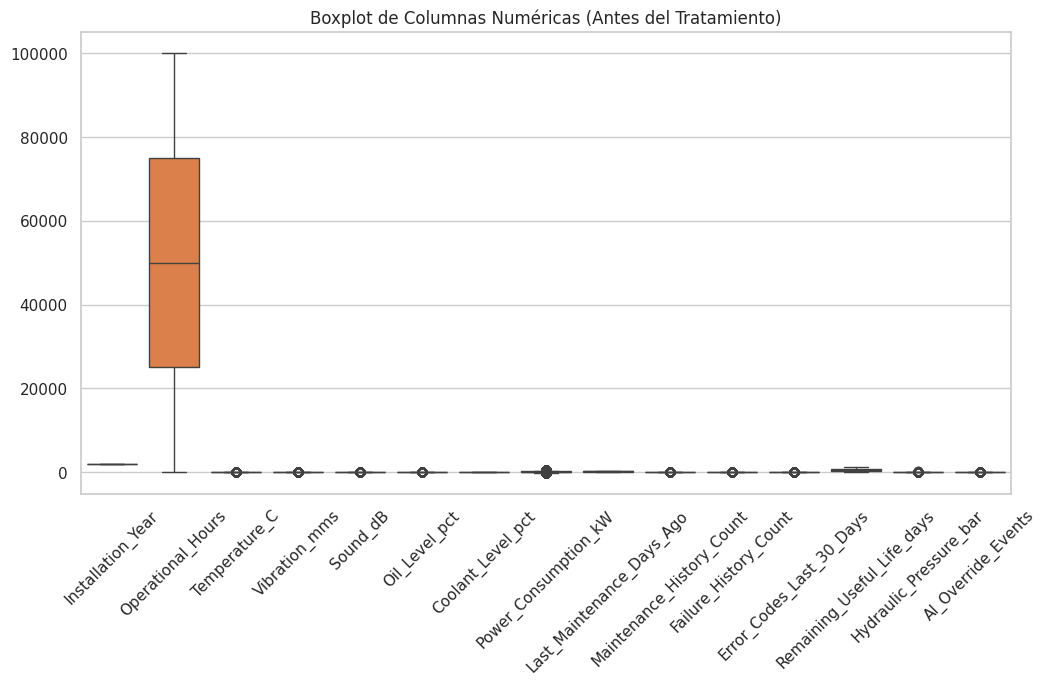

In [ ]:
# Visualización de outliers antes del tratamiento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columnas_numericas])
plt.title("Boxplot de Columnas Numéricas (Antes del Tratamiento)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Función para identificar outliers usando IQR
def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = columna[(columna < limite_inferior) | (columna > limite_superior)]
    return outliers

# Identificar outliers en cada columna numérica
for columna in columnas_numericas:
    outliers = detectar_outliers(df_1[columna])
    print(f"Número de outliers segun IQR en '{columna}': {len(outliers)}")
    print(f"Outliers en '{columna}': {outliers.values}\n")

Número de outliers segun IQR en 'Installation_Year': 0
Outliers en 'Installation_Year': []

Número de outliers segun IQR en 'Operational_Hours': 0
Outliers en 'Operational_Hours': []

Número de outliers segun IQR en 'Temperature_C': 3569
Outliers en 'Temperature_C': [105.02 115.14  19.37 ... 101.62 104.92  16.77]

Número de outliers segun IQR en 'Vibration_mms': 3449
Outliers en 'Vibration_mms': [23.78 -8.07 24.57 ... -4.59 23.72 -5.56]

Número de outliers segun IQR en 'Sound_dB': 3582
Outliers en 'Sound_dB': [ 38.66 109.06 102.79 ... 104.14  46.55  47.81]

Número de outliers segun IQR en 'Oil_Level_pct': 1708
Outliers en 'Oil_Level_pct': [ 9.15 12.7  13.39 ... 12.8   6.7  13.93]

Número de outliers segun IQR en 'Coolant_Level_pct': 0
Outliers en 'Coolant_Level_pct': []

Número de outliers segun IQR en 'Power_Consumption_kW': 3513
Outliers en 'Power_Consumption_kW': [ 385.29  392.67  -95.22 ...  384.98  382.53 -182.84]

Número de outliers segun IQR en 'Last_Maintenance_Days_Ago': 0
Out

Sesgadas: Oil level, Colant level, Maintenance_History_Count, Failure_History_Count, Error_Codes_Last_30_Days, Failure_Within_7_Days

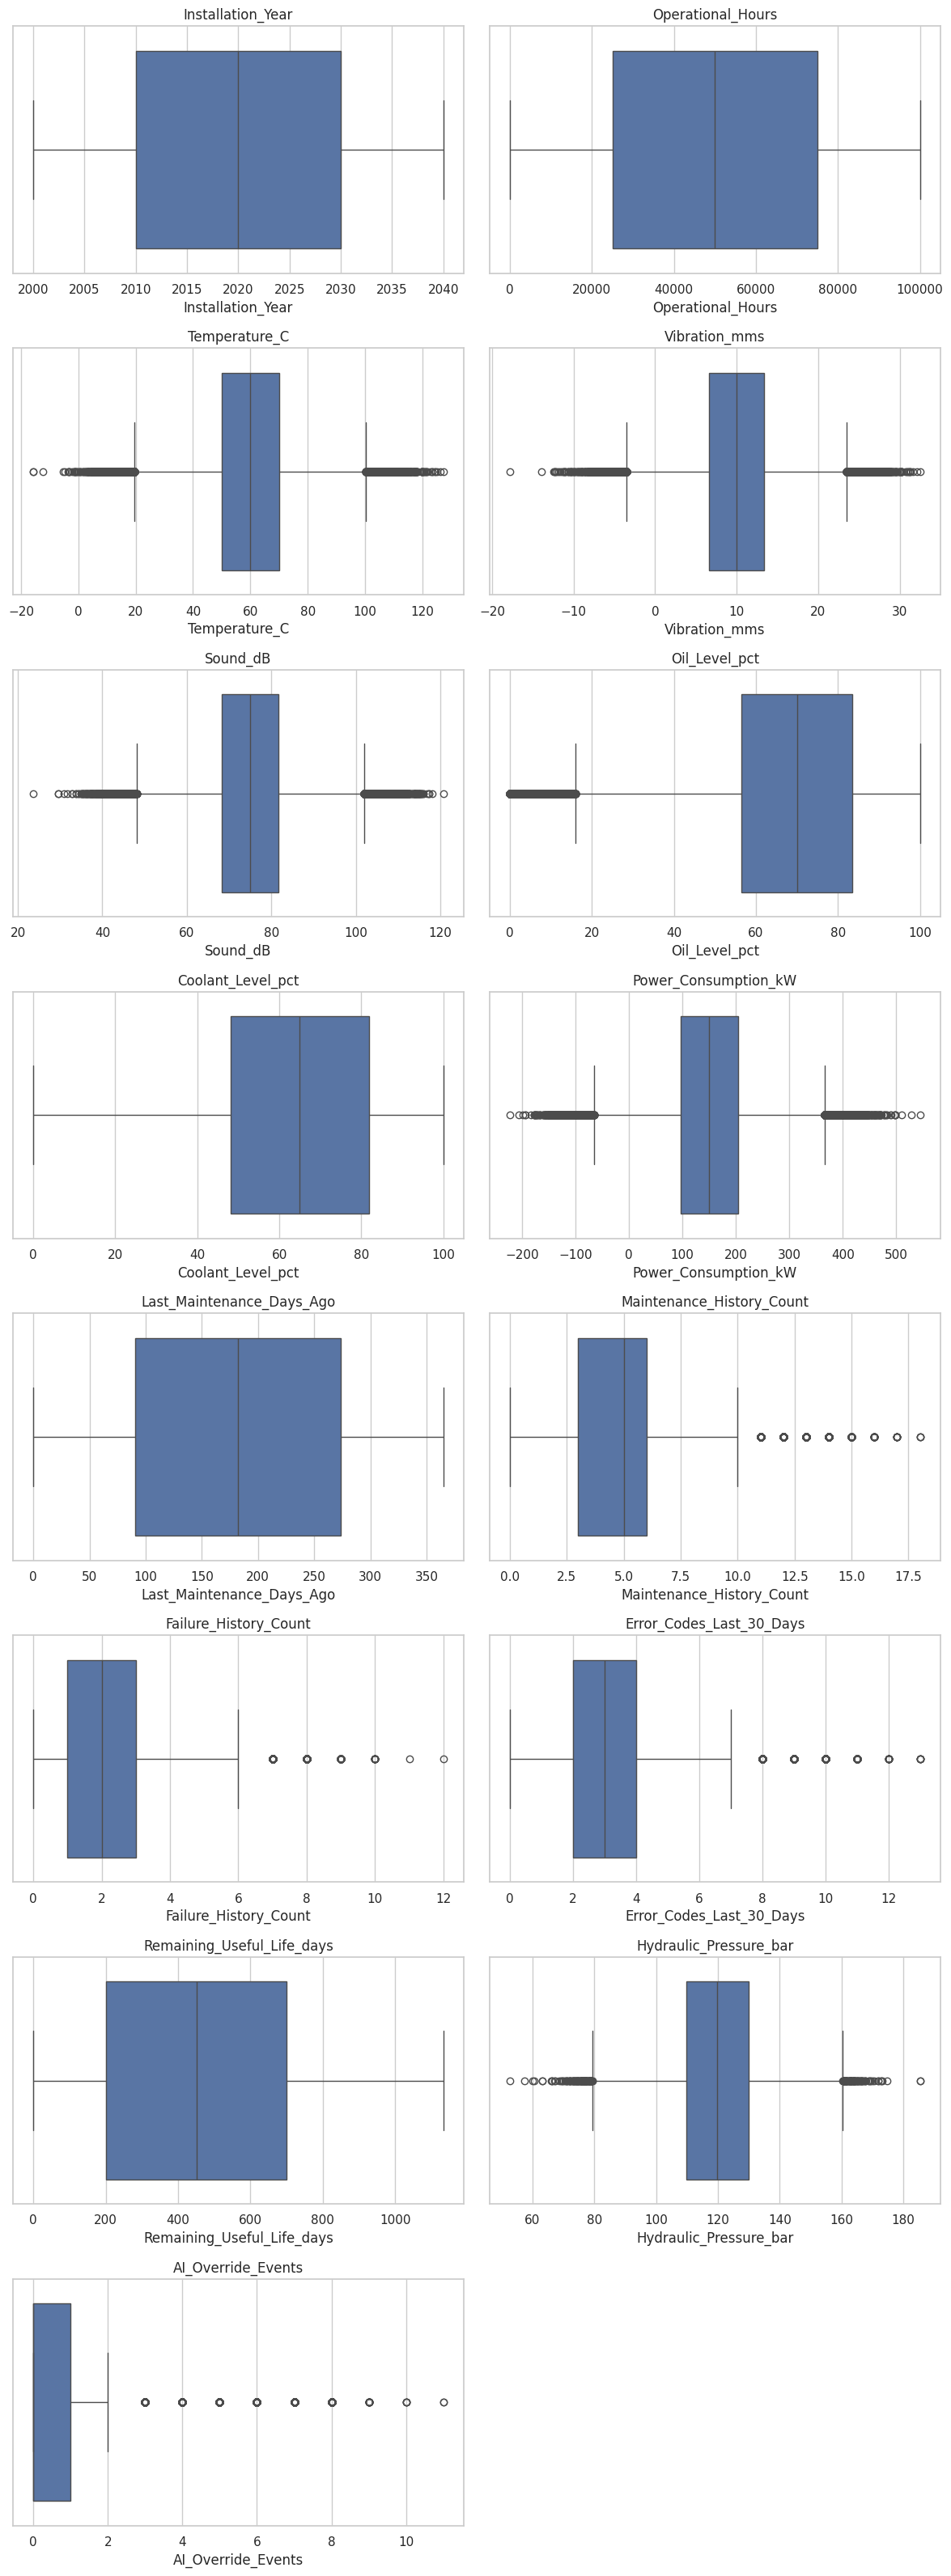

In [ ]:
# Generar gráficas individuales para las variables numéricas para visualizar los valores outliers
columnas_numericas = ['Installation_Year', 'Operational_Hours', 'Temperature_C',
       'Vibration_mms', 'Sound_dB', 'Oil_Level_pct', 'Coolant_Level_pct',
       'Power_Consumption_kW', 'Last_Maintenance_Days_Ago',
       'Maintenance_History_Count', 'Failure_History_Count',
       'Error_Codes_Last_30_Days', 'Remaining_Useful_Life_days',
       'Hydraulic_Pressure_bar', 'AI_Override_Events']

# Calcular el número de filas y columnas necesarias para los subplots
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(columnas_numericas) + n_cols - 1) // n_cols # Calculate rows needed

# Crear la figura y los ejes con el número correcto de subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 4)) # Ajustar figsize
fig.subplots_adjust(hspace=0.5)

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
    # Asegurarse de no acceder a un índice fuera de los límites si hay más columnas que subplots (aunque con el cálculo de n_rows esto no debería pasar)
    if i < len(axes):
        sns.boxplot(x=col, data=df, ax=axes[i]) # Usar axes[i]
        axes[i].set_title(col)

# Ocultar subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajustar el layout para evitar solapamiento
plt.show()

In [ ]:
# Medir el sesgo de cada variable con el coeficiente de asimetría (skewness)(≈ 0: Simétrica o normal; > 0 y < 1: Levemente sesgada a la derecha; ≥ 1: Fuertemente sesgada a la derecha; < 0 y > -1: Levemente sesgada a la izquierda; ≤ -1: Fuertemente sesgada a la izquierda)
df_1[columnas_numericas].skew()

Installation_Year             0.004596
Operational_Hours             0.000590
Temperature_C                 0.002043
Vibration_mms                -0.007103
Sound_dB                      0.002030
Oil_Level_pct                -0.291226
Coolant_Level_pct            -0.306282
Power_Consumption_kW         -0.000745
Last_Maintenance_Days_Ago     0.000683
Maintenance_History_Count     0.450035
Failure_History_Count         0.706340
Error_Codes_Last_30_Days      0.572035
Remaining_Useful_Life_days    0.045715
Hydraulic_Pressure_bar       -0.046173
AI_Override_Events            2.194635
dtype: float64

Como conclusion tenemos que la variable 'AI_Override_Events' esta fuertemente sesgada a la derecha por lo que merece una transformacion.

In [ ]:
from sklearn.preprocessing import PowerTransformer
# Se realiza una transformación Yeo-Johnson y se verifica
pt = PowerTransformer(method='yeo-johnson')
df_1['AI_Override_Events_yeojohnson'] = pt.fit_transform(df_1[['AI_Override_Events']])
df_1[['AI_Override_Events', 'AI_Override_Events_yeojohnson']].skew()

AI_Override_Events               2.194635
AI_Override_Events_yeojohnson    1.108565
dtype: float64

##<h3>Tratamiento de valores negativos</h3>  

---

In [ ]:
# Filtrar columnas numéricas que tengan al menos un valor negativo
cols_con_negativos = [col for col in df_1.select_dtypes(include='number').columns if (df_1[col] < 0).any()]

print("Columnas con valores negativos:")
print(cols_con_negativos)


Columnas con valores negativos:
['Temperature_C', 'Vibration_mms', 'Power_Consumption_kW', 'AI_Override_Events_yeojohnson']


Temperature_C: Temperatura no puede ser negativa en °C en un proceso industrial típico (a menos que midas frío extremo, pero es raro).  

Vibration_mms:  La vibración es una magnitud escalar positiva, como la distancia o la velocidad. Aunque los sensores miden ondas que sí pueden tener dirección (positiva o negativa), el valor reportado como vibración RMS o media es siempre positivo.  

Power_Consumption_kW: Un valor negativo indicaría que la máquina está generando energía en lugar de consumirla (como un motor actuando como generador).  

AI_Override_Events_yeojohnson: En general en el caso de la variable, los valores negativos después de la transformación Yeo-Johnson no son un problema, porque la transformación justamente está diseñada para manejar valores negativos y positivos. Por ejemplo, modelos de machine learning como regresiones, árboles, XGBoost, etc., no tienen problema con datos negativos en las variables.

In [ ]:
# Ver cuantos valores negativos hay por columna
for col in ['Temperature_C', 'Vibration_mms', 'Power_Consumption_kW', 'AI_Override_Events_yeojohnson']:
    negativos = (df_1[col] < 0).sum()
    print(f"{col}: {negativos} valores negativos")


Temperature_C: 18 valores negativos
Vibration_mms: 11467 valores negativos
Power_Consumption_kW: 15175 valores negativos
AI_Override_Events_yeojohnson: 370058 valores negativos


In [ ]:
# Elimino las filas con valores negativos al ser pocos de la columna Temperature_C
df_1 = df_1[(df_1['Temperature_C'] >= 0) ]
# Verifico si efectivamente se eliminaron
(df_1['Temperature_C'] < 0).sum()


np.int64(0)

In [ ]:
# Calcular la mediana solo de los valores válidos (positivos o cero)
mediana_vib = df_1[df_1['Vibration_mms'] >= 0]['Vibration_mms'].median()
mediana_power = df_1[df_1['Power_Consumption_kW'] >= 0]['Power_Consumption_kW'].median()

print(mediana_vib)
print(mediana_power)

10.14
153.03


In [ ]:
# Reemplazar los valores negativos por la mediana (No se ve afectada por valores extremos (como sí lo haría la media) y es recomendable en casos de pocos valores erroneos)
df_1.loc[df_1['Vibration_mms'] < 0, 'Vibration_mms'] = mediana_vib
df_1.loc[df_1['Power_Consumption_kW'] < 0, 'Power_Consumption_kW'] = mediana_power

In [ ]:
# Verificacion
print("Valores negativos en Vibration_mms:", (df_1['Vibration_mms'] < 0).sum())
print("Valores negativos en Power_Consumption_kW:", (df_1['Power_Consumption_kW'] < 0).sum())

Valores negativos en Vibration_mms: 0
Valores negativos en Power_Consumption_kW: 0


#**<h3>Dataset despues de la limpieza de datos</h3>**  

---

In [ ]:
df_1.shape

(499982, 22)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499982 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Machine_ID                     499982 non-null  object 
 1   Machine_Type                   499982 non-null  object 
 2   Installation_Year              499982 non-null  int64  
 3   Operational_Hours              499982 non-null  int64  
 4   Temperature_C                  499982 non-null  float64
 5   Vibration_mms                  499982 non-null  float64
 6   Sound_dB                       499982 non-null  float64
 7   Oil_Level_pct                  499982 non-null  float64
 8   Coolant_Level_pct              499982 non-null  float64
 9   Power_Consumption_kW           499982 non-null  float64
 10  Last_Maintenance_Days_Ago      499982 non-null  int64  
 11  Maintenance_History_Count      499982 non-null  int64  
 12  Failure_History_Count          4999

In [ ]:
df_1.head()

Machine_ID        Machine_Type  Installation_Year  Operational_Hours  \
0  MC_000000               Mixer               2027              81769   
1  MC_000001  Industrial_Chiller               2032              74966   
2  MC_000002      Pick_and_Place               2003              94006   
3  MC_000003       Vision_System               2007              76637   
4  MC_000004      Shuttle_System               2016              20870   

   Temperature_C  Vibration_mms  Sound_dB  Oil_Level_pct  Coolant_Level_pct  \
0          73.43          12.78     83.72          36.76              68.74   
1          58.32          14.99     77.04         100.00              62.13   
2          49.63          23.78     69.08          42.96              35.96   
3          63.73          12.38     85.58          94.90              48.94   
4          42.77           4.42     96.72          47.56              53.78   

   Power_Consumption_kW  ...  Failure_History_Count  AI_Supervision  \
0                 84.95  ...                      5            True   
1                154.61  ...                      2            True   
2                 51.90  ...                      1            True   
3                 75.61  ...                      1           False   
4                224.93  ...                      2           False   

   Error_Codes_Last_30_Days  Remaining_Useful_Life_days  \
0                         3                       162.0   
1                         4                       147.0   
2                         6                         0.0   
3                         4                       161.0   
4                         1                       765.0   

   Failure_Within_7_Days  Hydraulic_Pressure_bar  AI_Override_Events  \
0                  False                  119.86                   2   
1                  False                  119.86                   2   
2                   True                  119.86                   2   
3                  False                  119.86                   0   
4                  False                  119.86                   0   

   Machine_ID_cod  Machine_Type_cod  AI_Override_Events_yeojohnson  
0               0                21                       1.729149  
1               1                17                       1.729149  
2               2                23                       1.729149  
3               3                31                      -0.591363  
4               4                28                      -0.591363  

[5 rows x 22 columns]

#**<h3>Análisis Univariado Adicional</h3>**  

---

In [ ]:
df_1.columns


Index(['Machine_ID', 'Machine_Type', 'Installation_Year', 'Operational_Hours',
       'Temperature_C', 'Vibration_mms', 'Sound_dB', 'Oil_Level_pct',
       'Coolant_Level_pct', 'Power_Consumption_kW',
       'Last_Maintenance_Days_Ago', 'Maintenance_History_Count',
       'Failure_History_Count', 'AI_Supervision', 'Error_Codes_Last_30_Days',
       'Remaining_Useful_Life_days', 'Failure_Within_7_Days',
       'Hydraulic_Pressure_bar', 'AI_Override_Events', 'Machine_ID_cod',
       'Machine_Type_cod', 'AI_Override_Events_yeojohnson'],
      dtype='object')

**Variables Numericas continuas:** Installation_Year, Operational_Hours, Temperature_C, Vibration_mms, Sound_dB, Oil_Level_pct, Coolant_Level_pct, Power_Consumption_kW, Remaining_Useful_Life_days, Hydraulic_Pressure_bar.

**Variables Numericas Discretas:** Last_Maintenance_Days_Ago, Maintenance_History_Count, Failure_History_Count, Error_Codes_Last_30_Days, AI_Override_Events.

**Variables Categoricas:** AI_Supervision, Machine_Type, Failure_Within_7_Days (Binaria/categorica).



In [ ]:
import math
from scipy.stats import kurtosis

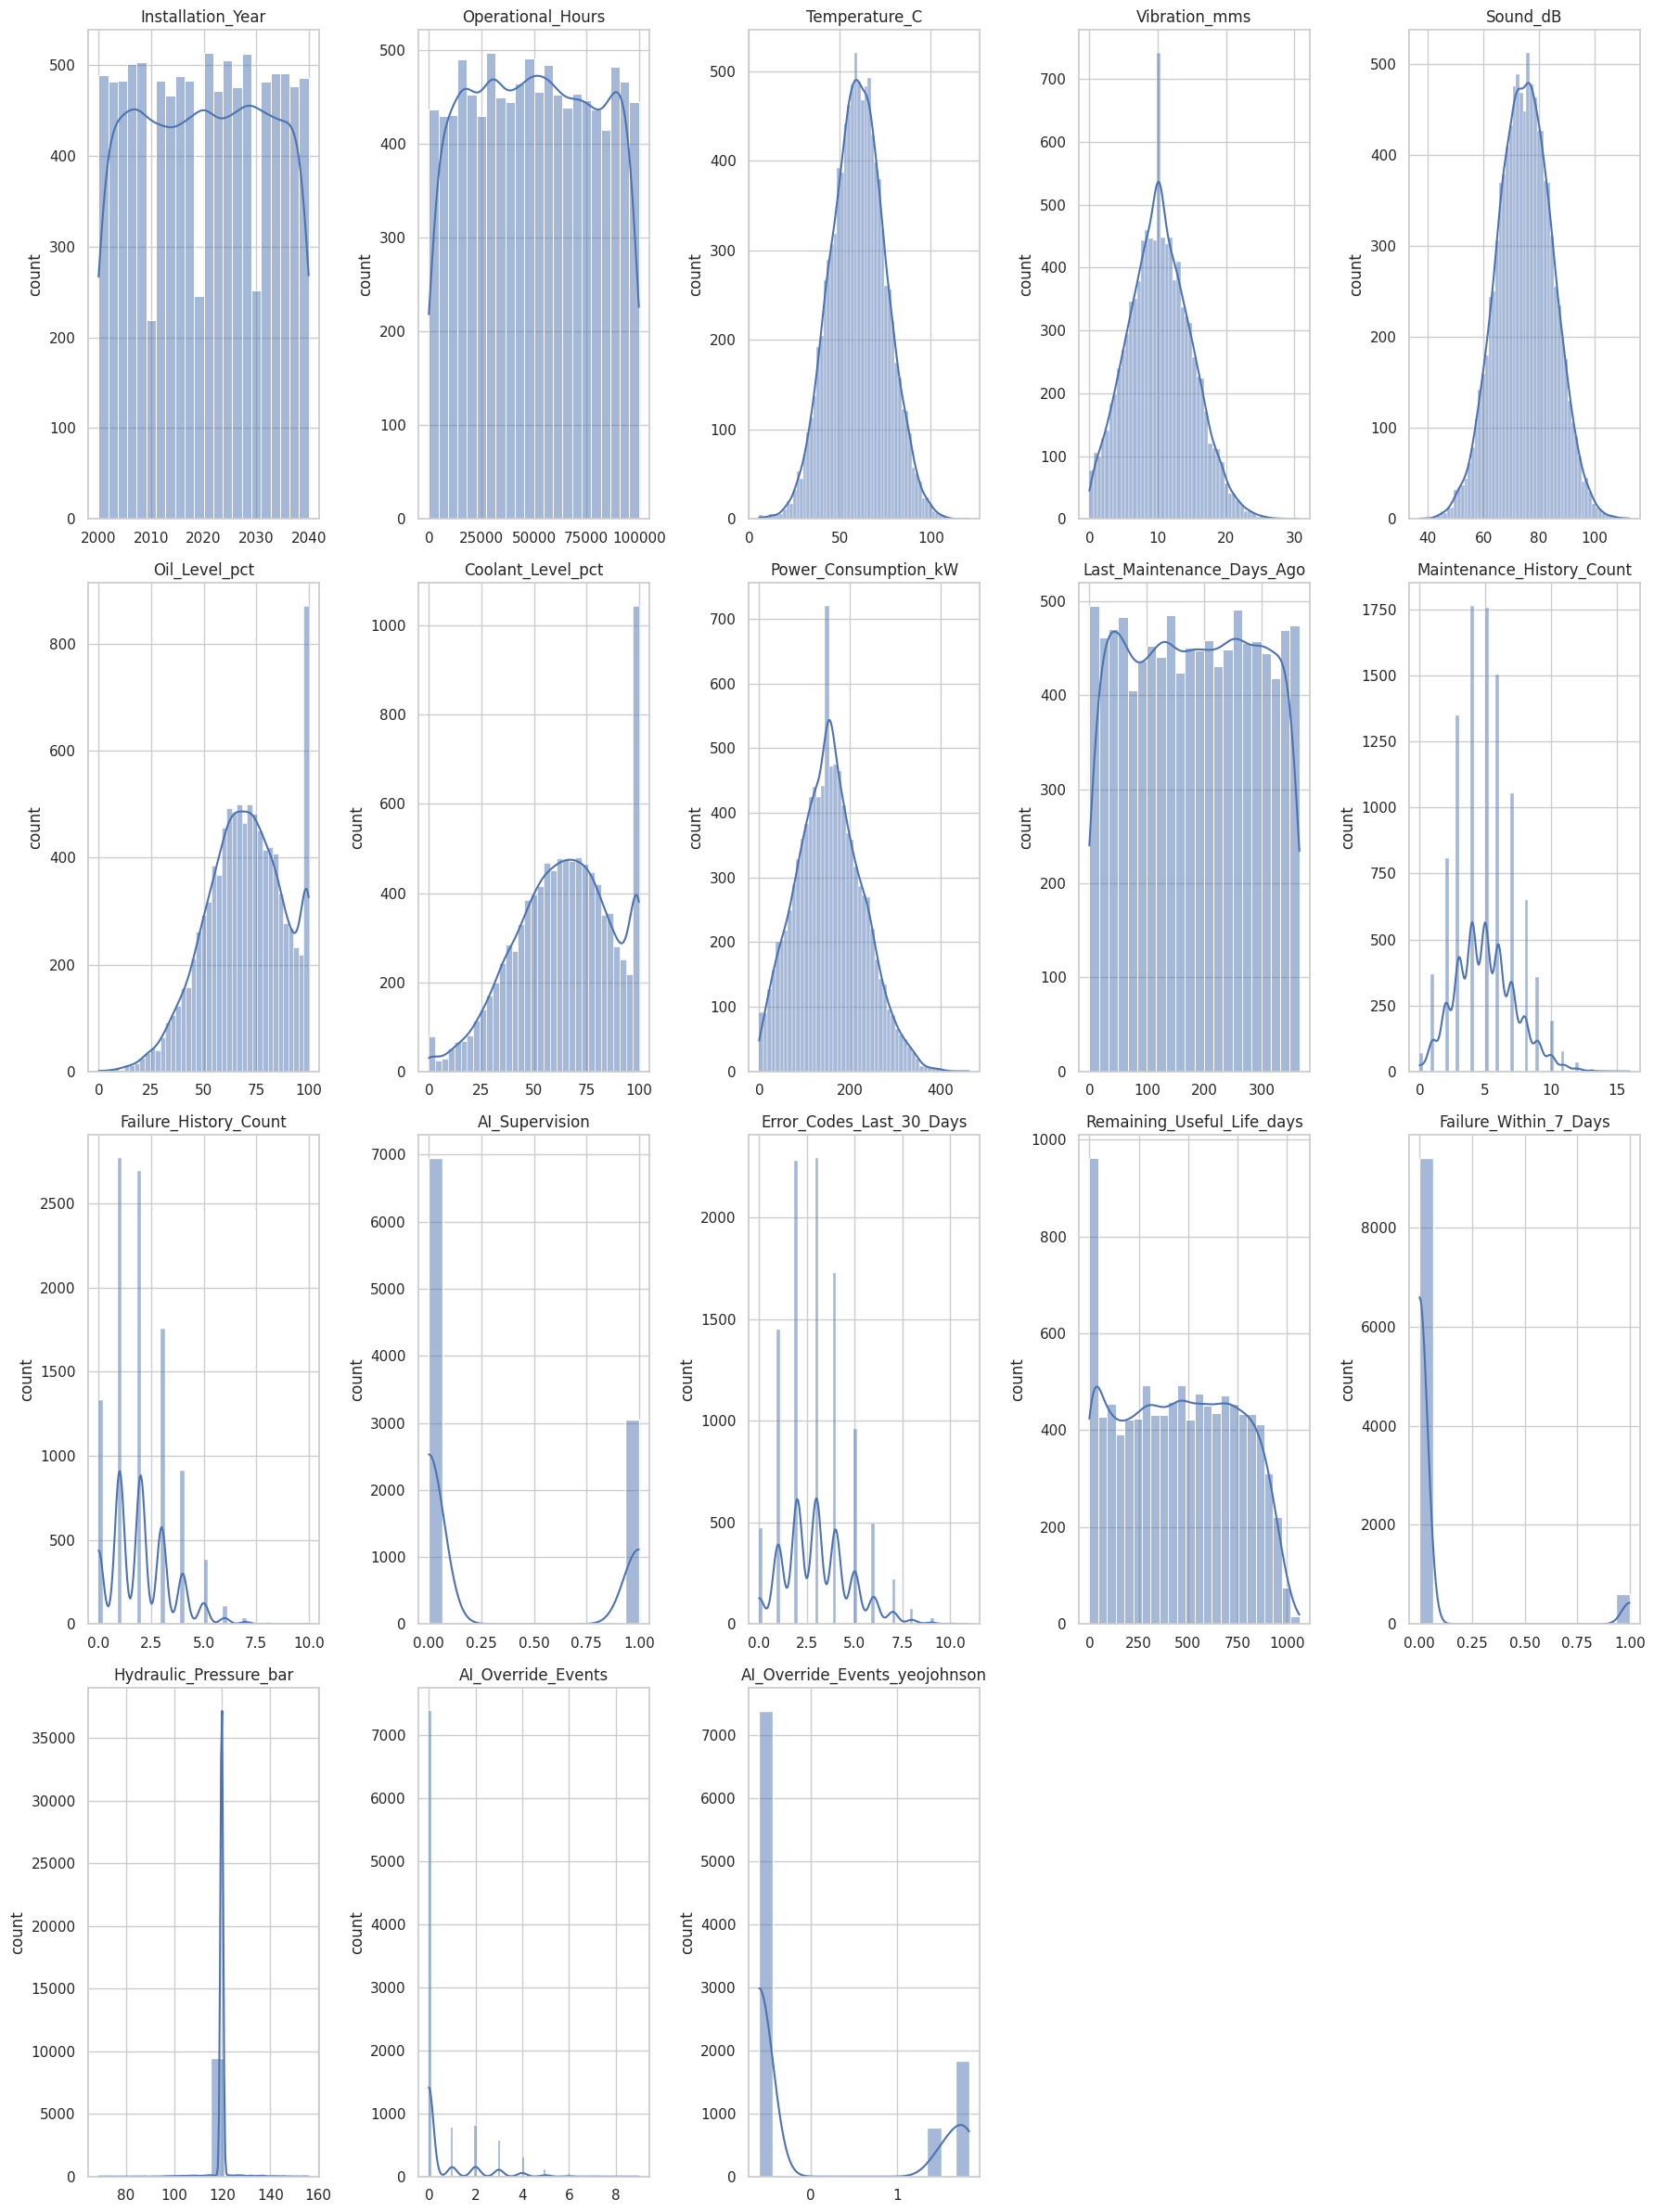

In [ ]:
# Muestreo para graficar
sample_df = df_1.sample(n=10000, random_state=42)

variables = [
    'Installation_Year', 'Operational_Hours', 'Temperature_C',
    'Vibration_mms', 'Sound_dB', 'Oil_Level_pct', 'Coolant_Level_pct',
    'Power_Consumption_kW', 'Last_Maintenance_Days_Ago',
    'Maintenance_History_Count', 'Failure_History_Count', 'AI_Supervision',
    'Error_Codes_Last_30_Days', 'Remaining_Useful_Life_days',
    'Failure_Within_7_Days', 'Hydraulic_Pressure_bar',
    'AI_Override_Events', 'AI_Override_Events_yeojohnson'
]

columns = 5
rows = math.ceil(len(variables) / columns)

fig, axes = plt.subplots(rows, columns, figsize=(18, 6 * rows))
axes = axes.flatten()

for idx, variable in enumerate(variables):
    ax = axes[idx]
    if pd.api.types.is_numeric_dtype(sample_df[variable]):
        sns.histplot(sample_df[variable], ax=ax, kde=True)
    else:
        sns.countplot(x=sample_df[variable], ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    ax.set_title(variable)
    ax.set_xlabel("")
    ax.set_ylabel("count")

# Ocultar ejes vacíos si sobran
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


De esta grafica interpretamos varios aspectos, primero que las variables (Temperature_C, Vibration_mms, Sound_dB, Power_Consumption_kW, Last_Maintenance_Days_Ago, Remaining_Useful_Life_days) tienen forma aproximadamente normal, luego tenemos la variable (Error_Codes_Last_30_Days) con alto conteo en 0-3 errores, pero pocos casos extremos, la variable (AI_Override_Events) se encontraba sesgada pero se hizo la transformación correcta con Yeo-Johnson y por último la variable (Failure_Within_7_Days) Binaria, altamente desbalanceada (muchos 0s, pocos 1s) pero al no ser variable objetivo es opcional realizar una transformación.  

En el caso de las variables sesgadas (Oil level, Colant level, Maintenance_History_Count, Failure_History_Count, Error_Codes_Last_30_Days) como ya se hizo un analisis anteriormente y se verifico que son pocos valores outliers con respeto al valor total del dataset se procede a conservarlos.

In [ ]:
# Seleccionar solo columnas numéricas
num_cols = df_1.select_dtypes(include='number')

# Calcular la curtosis para cada columna
kurtosis_vals = num_cols.apply(lambda x: kurtosis(x, fisher=True))

# Ordenar y mostrar los resultados
kurtosis_sorted = kurtosis_vals.sort_values(ascending=False)
print("Curtosis (Fisher=True):")
print(kurtosis_sorted)

Curtosis (Fisher=True):
Hydraulic_Pressure_bar           46.406775
AI_Override_Events                4.644311
Failure_History_Count             0.491527
Error_Codes_Last_30_Days          0.311166
Maintenance_History_Count         0.203408
Sound_dB                          0.001700
Temperature_C                     0.001197
Power_Consumption_kW             -0.150331
Vibration_mms                    -0.184316
Oil_Level_pct                    -0.375694
Coolant_Level_pct                -0.500395
AI_Override_Events_yeojohnson    -0.751653
Remaining_Useful_Life_days       -1.184992
Last_Maintenance_Days_Ago        -1.198477
Operational_Hours                -1.198709
Machine_ID_cod                   -1.200025
Installation_Year                -1.202187
Machine_Type_cod                 -1.203031
dtype: float64


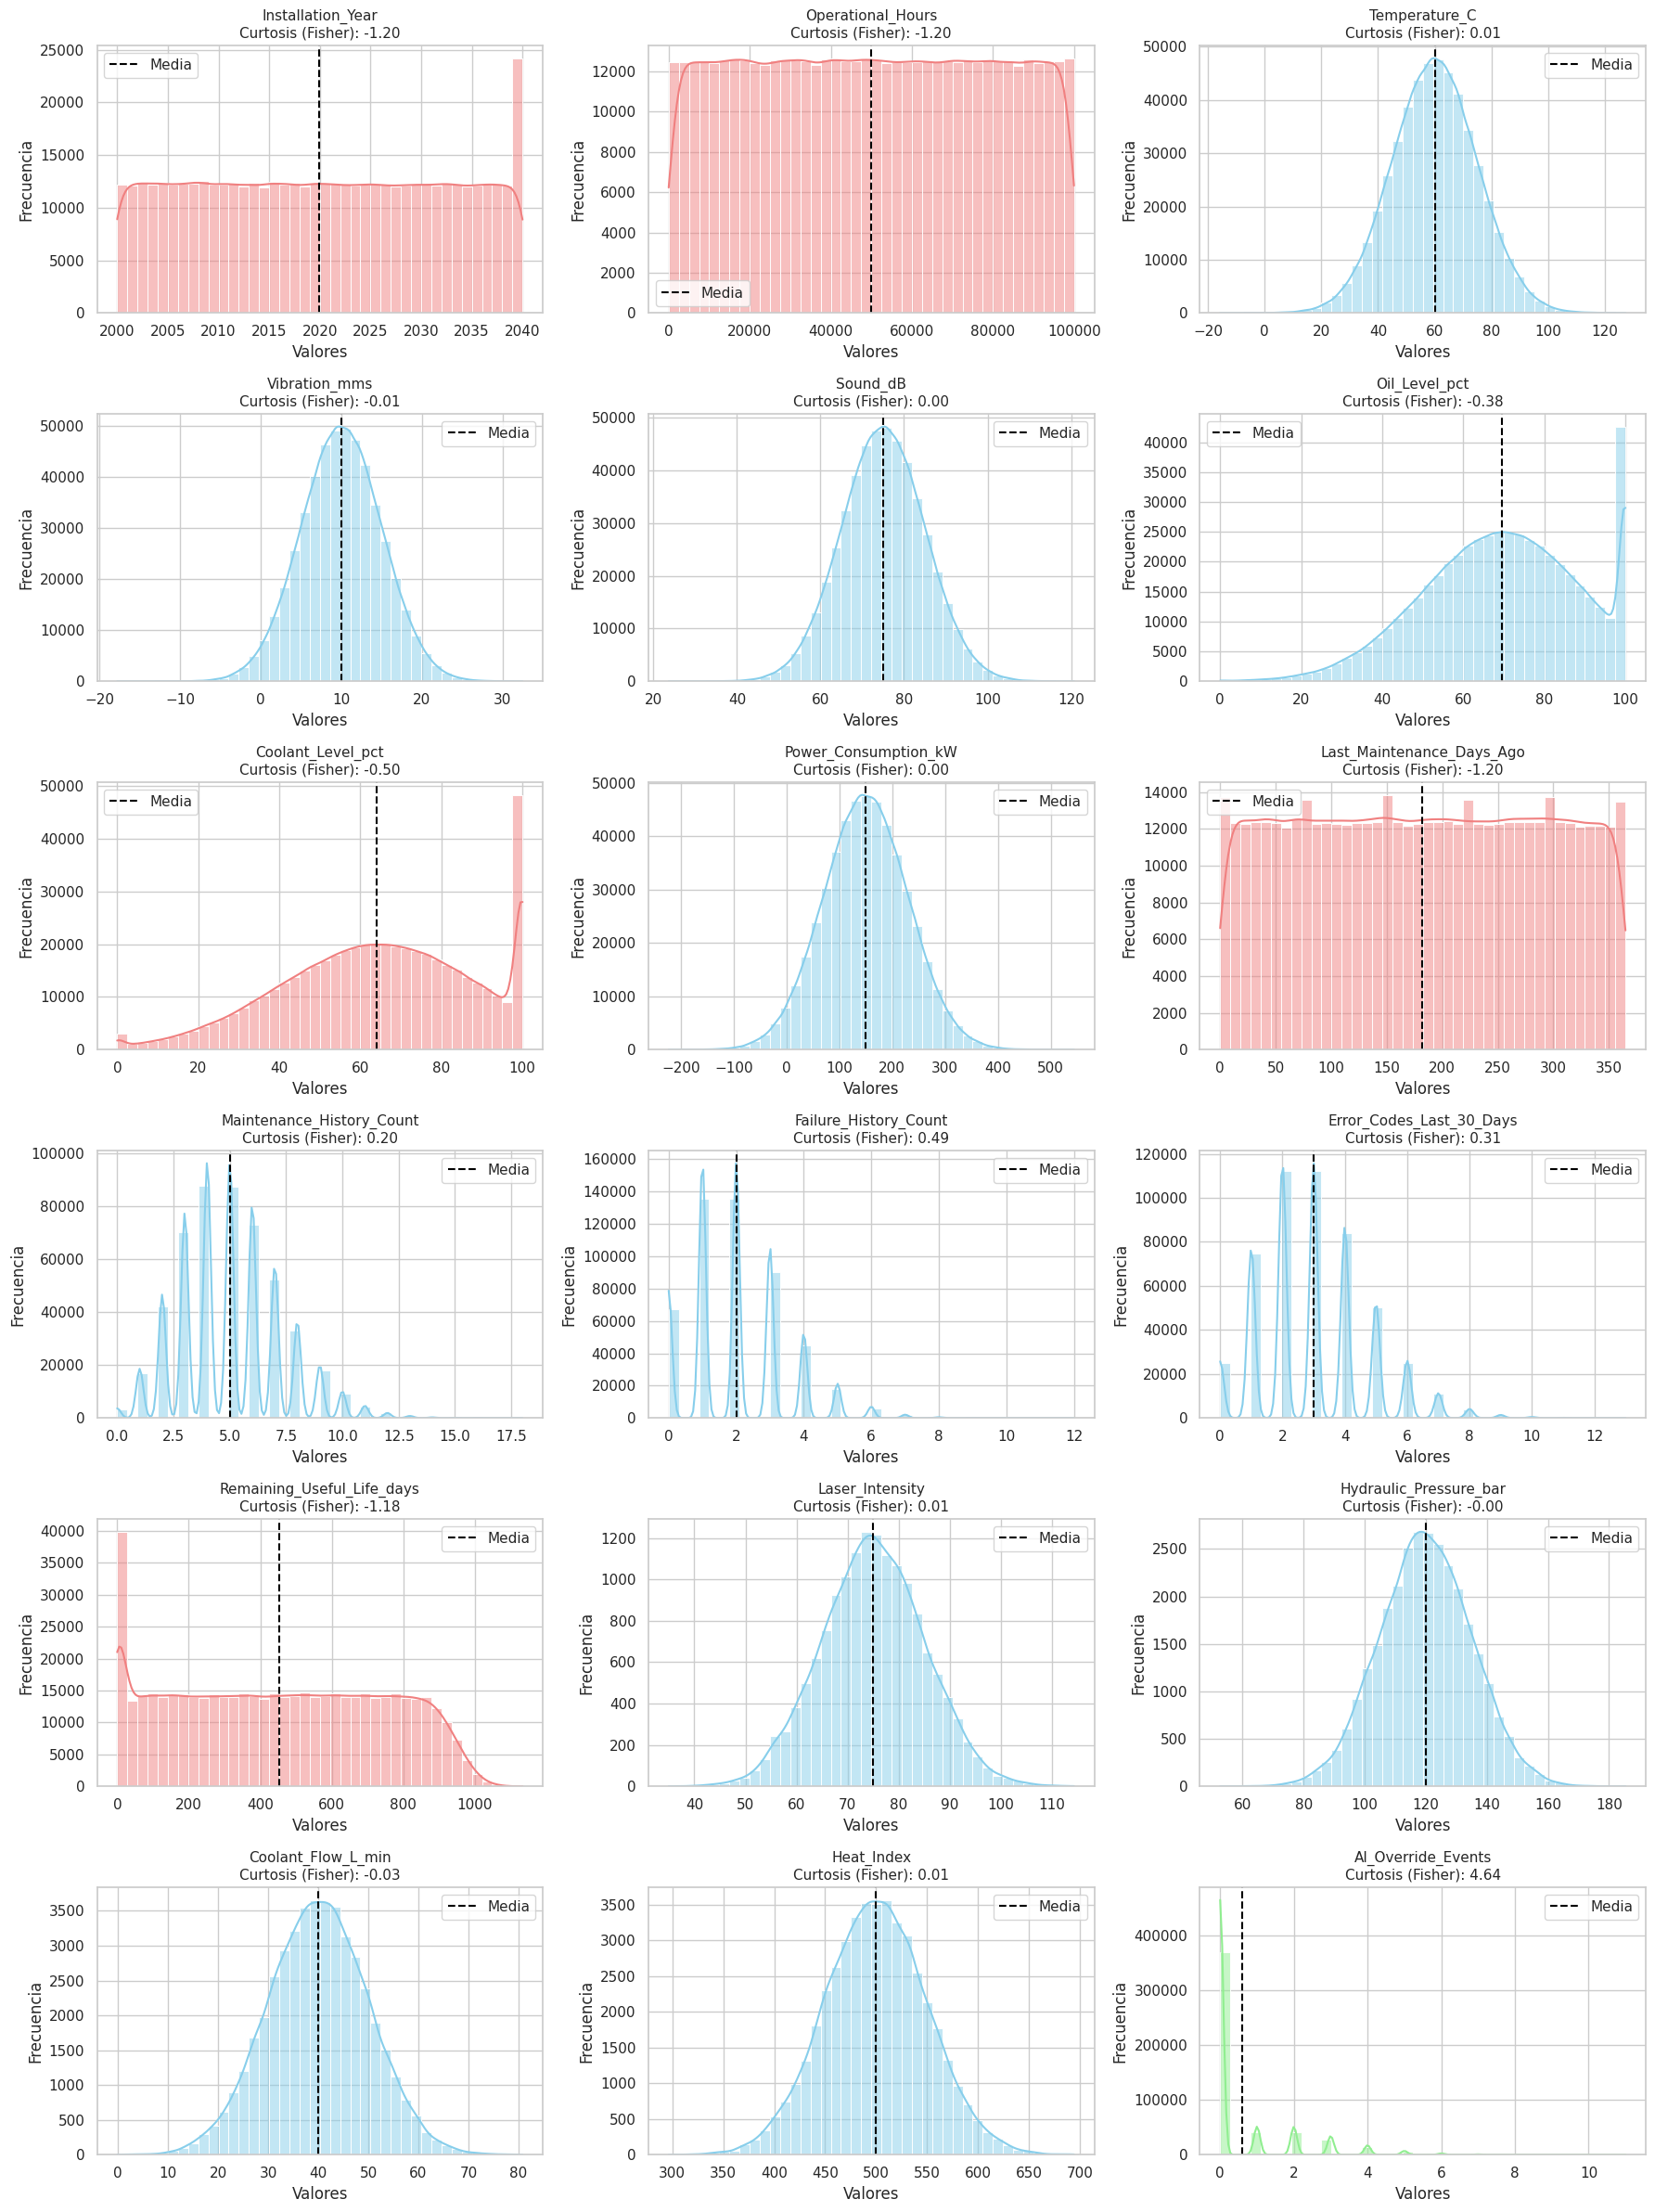

In [ ]:
# Mesocúrtica (≈ 0): entre -0.5 y 0.5 → color = 'azul'

# Leptocúrtica (> 0.5): color = 'verde'

# Platicúrtica (< -0.5): color = 'rosa'

# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include='number')

# Número de subplots por fila
cols = 3
rows = (len(num_cols.columns) + cols - 1) // cols

# Crear la figura
fig, axs = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
axs = axs.flatten()

# Función para elegir color según curtosis
def get_color(kurt):
    if kurt > 0.5:
        return 'lightgreen'   # Leptocúrtica
    elif kurt < -0.5:
        return 'lightcoral'   # Platicúrtica
    else:
        return 'skyblue'      # Mesocúrtica

# Graficar cada variable
for i, col in enumerate(num_cols.columns):
    kurt = df[col].kurt()
    color = get_color(kurt)

    sns.histplot(df[col], kde=True, bins=40, ax=axs[i], color=color)
    axs[i].axvline(df[col].mean(), color='black', linestyle='--', label='Media')
    axs[i].set_title(f'{col}\nCurtosis (Fisher): {kurt:.2f}', fontsize=11)
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('Frecuencia')
    axs[i].legend()

# Eliminar subplots vacíos
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

**Curtosis alta (colas pesadas, valores extremos):**

Hydraulic_Pressure_bar (46.4): Curtosis extremadamente alta → muchísimos valores extremos. Esto puede generar problemas en modelos sensibles a outliers (como regresiones).  

AI_Override_Events (4.64): También bastante leptocúrtica → valores extremos moderadamente frecuentes. Y en este caso al ser la variable anterior a su transformacion no la consideramos.  

**Curtosis cercana a 0:**

Variables como Sound_dB, Temperature_C → Distribución normal. Estas variables no parecen tener outliers importantes.  

**Curtosis negativa (colas ligeras, más concentración alrededor de la media):**  

Variables como Operational_Hours, Remaining_Useful_Life_days, Installation_Year tienen valores negativos → distribuciones más planas, menos extremos.



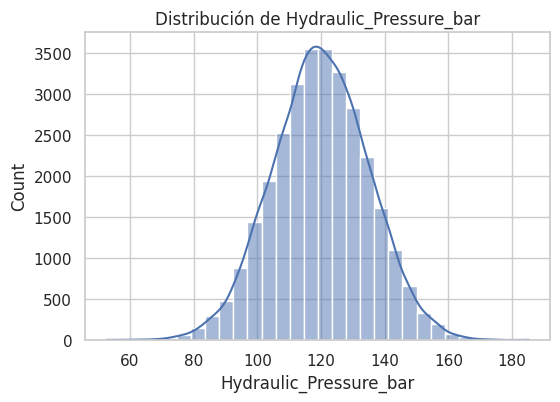

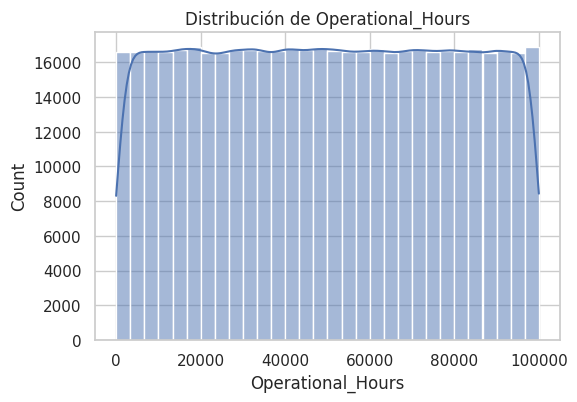

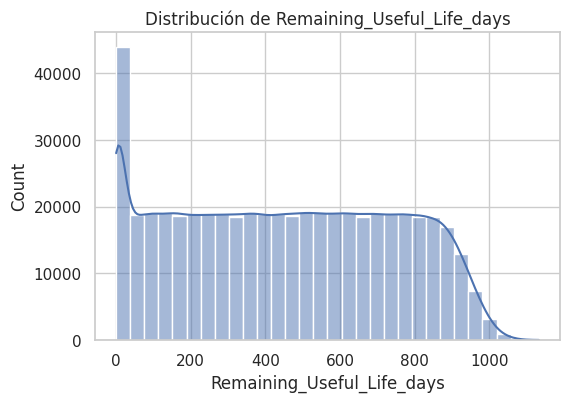

In [ ]:
# Visualizar las variables con curtosis más alta y más baja y ademas la variable objetivo
cols_to_plot = ['Hydraulic_Pressure_bar', 'Operational_Hours', 'Remaining_Useful_Life_days']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()

Como conclusión procedemos a realizar una transformación a la variable Hydraulic_Pressure_bar debido a su análisis de curtosis, el cual dió (46.4), una curtosis extremadamente alta.

In [ ]:
# Curtosis original
curtosis_original = kurtosis(df_1['Hydraulic_Pressure_bar'], fisher=True)
print("Curtosis original:", curtosis_original)

# Transformación logarítmica usando log1p
df_1['Hydraulic_Pressure_bar_log1p'] = np.log1p(df_1['Hydraulic_Pressure_bar'])

# Curtosis después de la transformación
curtosis_transformada = kurtosis(df_1['Hydraulic_Pressure_bar_log1p'], fisher=True)
print("Curtosis después de log1p:", curtosis_transformada)

Curtosis original: 46.40677523159509
Curtosis después de log1p: 55.09802850685871


In [ ]:
from scipy.stats import yeojohnson

df_1['Hydraulic_Pressure_bar_yeojohnson'], lmbda = yeojohnson(df_1['Hydraulic_Pressure_bar'])
print("Lambda de Yeo-Johnson:", lmbda)
print("Curtosis después de Yeo-Johnson:", kurtosis(df_1['Hydraulic_Pressure_bar_yeojohnson'], fisher=True))


Lambda de Yeo-Johnson: 1.295924221863812
Curtosis después de Yeo-Johnson: 46.35180949172075


**Transformación	Curtosis:**  
Original	46.41  
log1p	55.10 🔺  
Yeo-Johnson (λ = 1.29); 46.35 🔻 (mínimo)  

En conclusion se puede ver que luego de haber realizado dos transformaciones no se visualiza cambios notables, entonces procedemos a ver su correlacion con la variable objetivo para un analisis supuesto de eliminacion de la variable.

In [ ]:
correlacion_original = df_1['Hydraulic_Pressure_bar'].corr(df_1['Remaining_Useful_Life_days'])
print(f"Correlación (original): {correlacion_original:.4f}")


Correlación (original): 0.0015


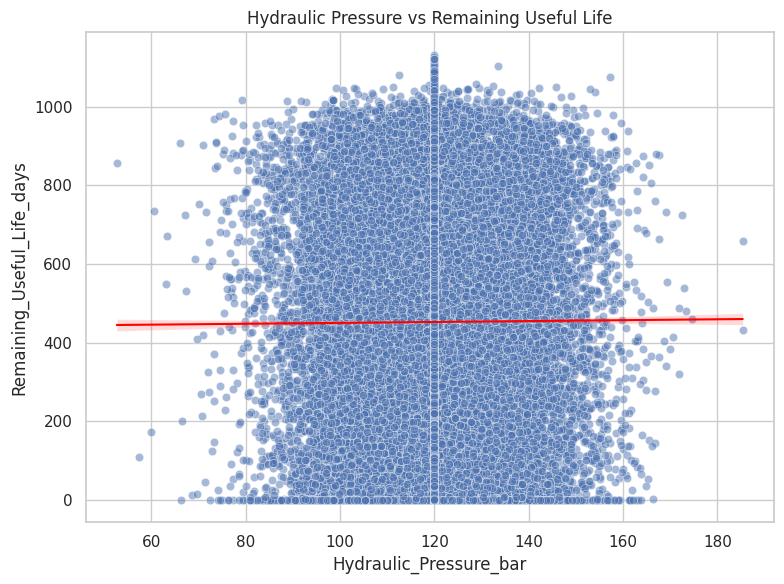

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_1, x='Hydraulic_Pressure_bar', y='Remaining_Useful_Life_days', alpha=0.5)
plt.title('Hydraulic Pressure vs Remaining Useful Life')
plt.xlabel('Hydraulic_Pressure_bar')
plt.ylabel('Remaining_Useful_Life_days')

# Mostrar la línea de tendencia (opcional)
sns.regplot(data=df_1, x='Hydraulic_Pressure_bar', y='Remaining_Useful_Life_days',
            scatter=False, color='red', line_kws={'linewidth':1.5})

plt.grid(True)
plt.tight_layout()
plt.show()


En conclusión, la correlación 0.0015 → prácticamente nula, además el grafico muestra una nube completamente dispersa, sin ninguna tendencia clara. Y la línea de línea de regresión (roja) es casi horizontal lo que confirma que no hay relación lineal entre Hydraulic_Pressure_bar y Remaining_Useful_Life_days. Ahora para proceder a la eliminación de la variable habría que analizar si no hay una justificación técnica/mecánica de que la presión hidráulica afecte directamente la vida útil.  O también otra opción viable es no considerarla a la hora de realizar el modelo como una variable predictoria.

#**<h3>Análisis Bivariado Adicional</h3>**  

---



**Correlación de Pearson (para linealidad):**

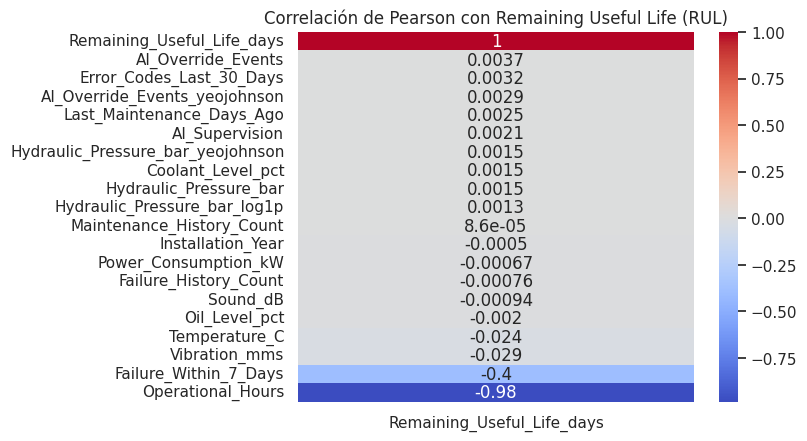

In [ ]:
numeric_cols = ['Installation_Year', 'Operational_Hours',
       'Temperature_C', 'Vibration_mms', 'Sound_dB', 'Oil_Level_pct',
       'Coolant_Level_pct', 'Power_Consumption_kW',
       'Last_Maintenance_Days_Ago', 'Maintenance_History_Count',
       'Failure_History_Count', 'AI_Supervision', 'Error_Codes_Last_30_Days',
       'Failure_Within_7_Days',
       'Hydraulic_Pressure_bar', 'AI_Override_Events',
       'AI_Override_Events_yeojohnson', 'Hydraulic_Pressure_bar_log1p',
       'Hydraulic_Pressure_bar_yeojohnson']

corr = df_1[numeric_cols + ['Remaining_Useful_Life_days']].corr()
sns.heatmap(corr[['Remaining_Useful_Life_days']].sort_values(by='Remaining_Useful_Life_days', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación de Pearson con Remaining Useful Life (RUL)')
plt.show()

# Interpretacion del grafico:
# r = 1: correlación positiva perfecta
# r = -1: correlación negativa perfecta
# r = 0: sin correlación


**Correlación de Spearman:**

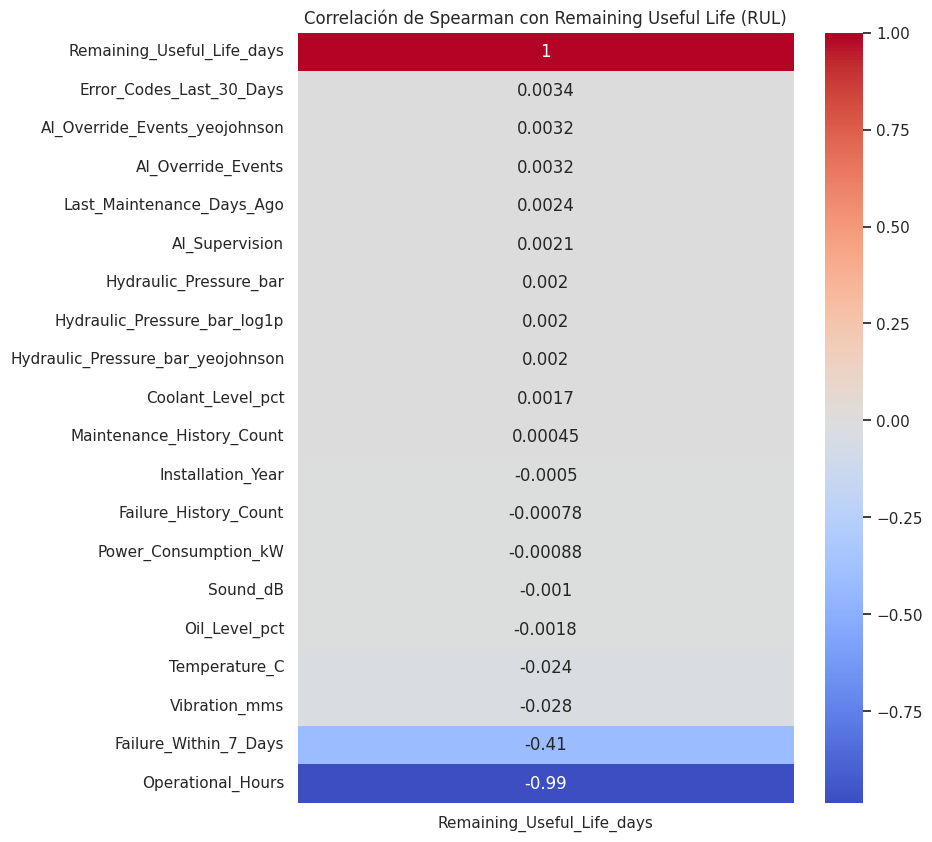

In [ ]:
numeric_cols = ['Installation_Year', 'Operational_Hours',
       'Temperature_C', 'Vibration_mms', 'Sound_dB', 'Oil_Level_pct',
       'Coolant_Level_pct', 'Power_Consumption_kW',
       'Last_Maintenance_Days_Ago', 'Maintenance_History_Count',
       'Failure_History_Count', 'AI_Supervision', 'Error_Codes_Last_30_Days',
       'Failure_Within_7_Days',
       'Hydraulic_Pressure_bar', 'AI_Override_Events',
       'AI_Override_Events_yeojohnson', 'Hydraulic_Pressure_bar_log1p',
       'Hydraulic_Pressure_bar_yeojohnson']

# Calcular matriz de correlación de Spearman
spearman_corr = df_1[numeric_cols + ['Remaining_Useful_Life_days']].corr(method='spearman')

# Filtrar solo correlaciones con la variable objetivo
spearman_with_rul = spearman_corr[['Remaining_Useful_Life_days']].sort_values(by='Remaining_Useful_Life_days', ascending=False)

# Graficar
plt.figure(figsize=(8, 10))
sns.heatmap(spearman_with_rul, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación de Spearman con Remaining Useful Life (RUL)')
plt.show()

# Interpretacion del grafico:
# 0.8 a 1.0 (o -0.8 a -1.0): correlación fuerte
# 0.6 a 0.8 (o -0.6 a -0.8): correlación moderada
# 0.4 a 0.6 (o -0.4 a -0.6): correlación débil
# 0.0 a 0.4 (o 0.0 a -0.4): sin correlación significativa

**Grafico de dispersion de variables numericas con respecto a Remaining_Useful_Life_days**

In [ ]:
# Variables numéricas
variables_numericas = [
    'Installation_Year', 'Operational_Hours', 'Temperature_C', 'Vibration_mms',
    'Sound_dB', 'Oil_Level_pct', 'Coolant_Level_pct', 'Power_Consumption_kW',
    'Last_Maintenance_Days_Ago', 'Maintenance_History_Count', 'Failure_History_Count',
    'AI_Supervision', 'Error_Codes_Last_30_Days', 'Failure_Within_7_Days',
    'Hydraulic_Pressure_bar', 'AI_Override_Events', 'AI_Override_Events_yeojohnson',
    'Hydraulic_Pressure_bar_log1p', 'Hydraulic_Pressure_bar_yeojohnson'
]

# Cantidad de subplots
n = len(variables_numericas)
cols = 4
rows = -(-n // cols)  # redondeo hacia arriba

# Crear figura
fig, axes = plt.subplots(rows, cols, figsize=(20, 4.5 * rows))
axes = axes.flatten()

# Crear un gráfico por variable
for i, var in enumerate(variables_numericas):
    sns.scatterplot(data=df_1, x=var, y='Remaining_Useful_Life_days', ax=axes[i], s=10)
    axes[i].set_title(f'{var} vs RUL')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('RUL')

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general y ajuste
fig.suptitle('Dispersión de Variables Numéricas vs Remaining Useful Life (RUL)', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


Output hidden; open in https://colab.research.google.com to view.

Como conclusión tenemos la variable Operational_Hours con una correlación Spearman: -0.99 y una Pearson: -0.98 lo cual esta tiene muy alta correlación negativa. Lo que significa que cuantas más horas operativas tiene una máquina, menos vida útil restante le queda. Esto es lógico y esperable. Y en cuanto a la variable Failure_Within_7_Days tiene una correlación Spearman -0,41 y una correlación Pearson -0,40. También tiene una correlación moderadamente negativa. Por ende, si una máquina va a fallar pronto, claramente tiene poco RUL.  

Luego tenemos variables como (Temperature_C, Vibration_mms, Oil_Level_pct, Sound_dB, AI_Supervision)que tienen coeficientes de Spearman y Pearson muy cercanos a 0, lo que indica que no tienen relación lineal ni monótona fuerte con RUL. Algunas podrían tener efectos no lineales, interacciones, o ser útiles combinadas con otras.

**Remaining Useful Life por tipo de máquina**

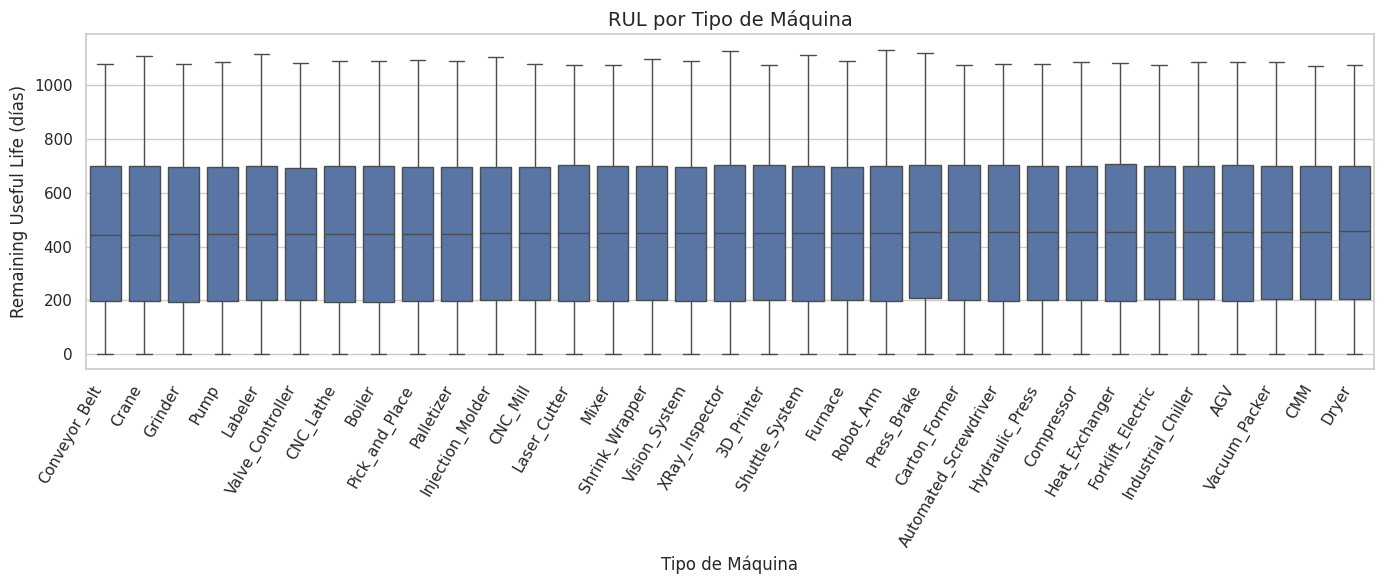

In [ ]:
plt.figure(figsize=(14, 6))  # Ajuste del tamaño del gráfico

# Ordenar por mediana de RUL (opcional pero útil)
orden = df.groupby('Machine_Type')['Remaining_Useful_Life_days'].median().sort_values().index

# Boxplot
sns.boxplot(data=df, x='Machine_Type', y='Remaining_Useful_Life_days', order=orden)

# Estética
plt.xticks(rotation=60, ha='right')
plt.title('RUL por Tipo de Máquina', fontsize=14)
plt.xlabel('Tipo de Máquina')
plt.ylabel('Remaining Useful Life (días)')
plt.tight_layout()
plt.show()


En conclusión, la mediana de RUL es bastante similar entre tipos de máquinas, todas las máquinas tienen una mediana de RUL cercana a los 700 días, lo cual indica que, en promedio, no hay grandes diferencias en la durabilidad base entre tipos.  

Hay alta variabilidad dentro de cada tipo, Todas las cajas tienen un rango muy amplio (desde cerca de 0 hasta más de 1000 días).  

Y por último no hay tipos de máquinas particularmente más frágiles, no se observa un tipo con una mediana muy baja o con una mayoría de valores bajos. Esto sugiere que el tipo de máquina por sí solo no es un gran predictor del RUL.


**Remaining Useful Life por supervision de IA**

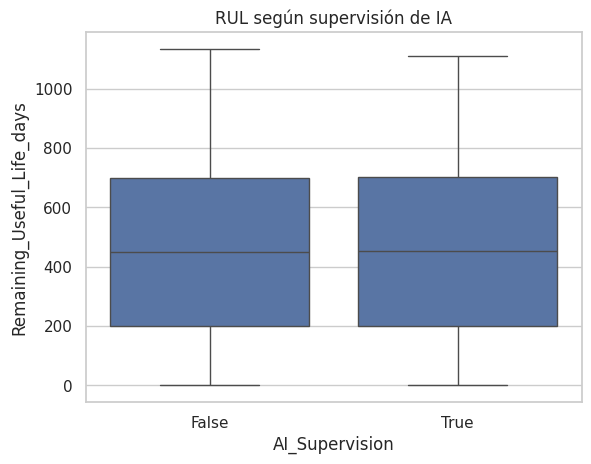

In [ ]:
sns.boxplot(x='AI_Supervision', y='Remaining_Useful_Life_days', data=df_1)
plt.title("RUL según supervisión de IA")
plt.show()


En conclusion, podemos visualizar que la supervision de la IA no realiza un cambio significante en el RUL.

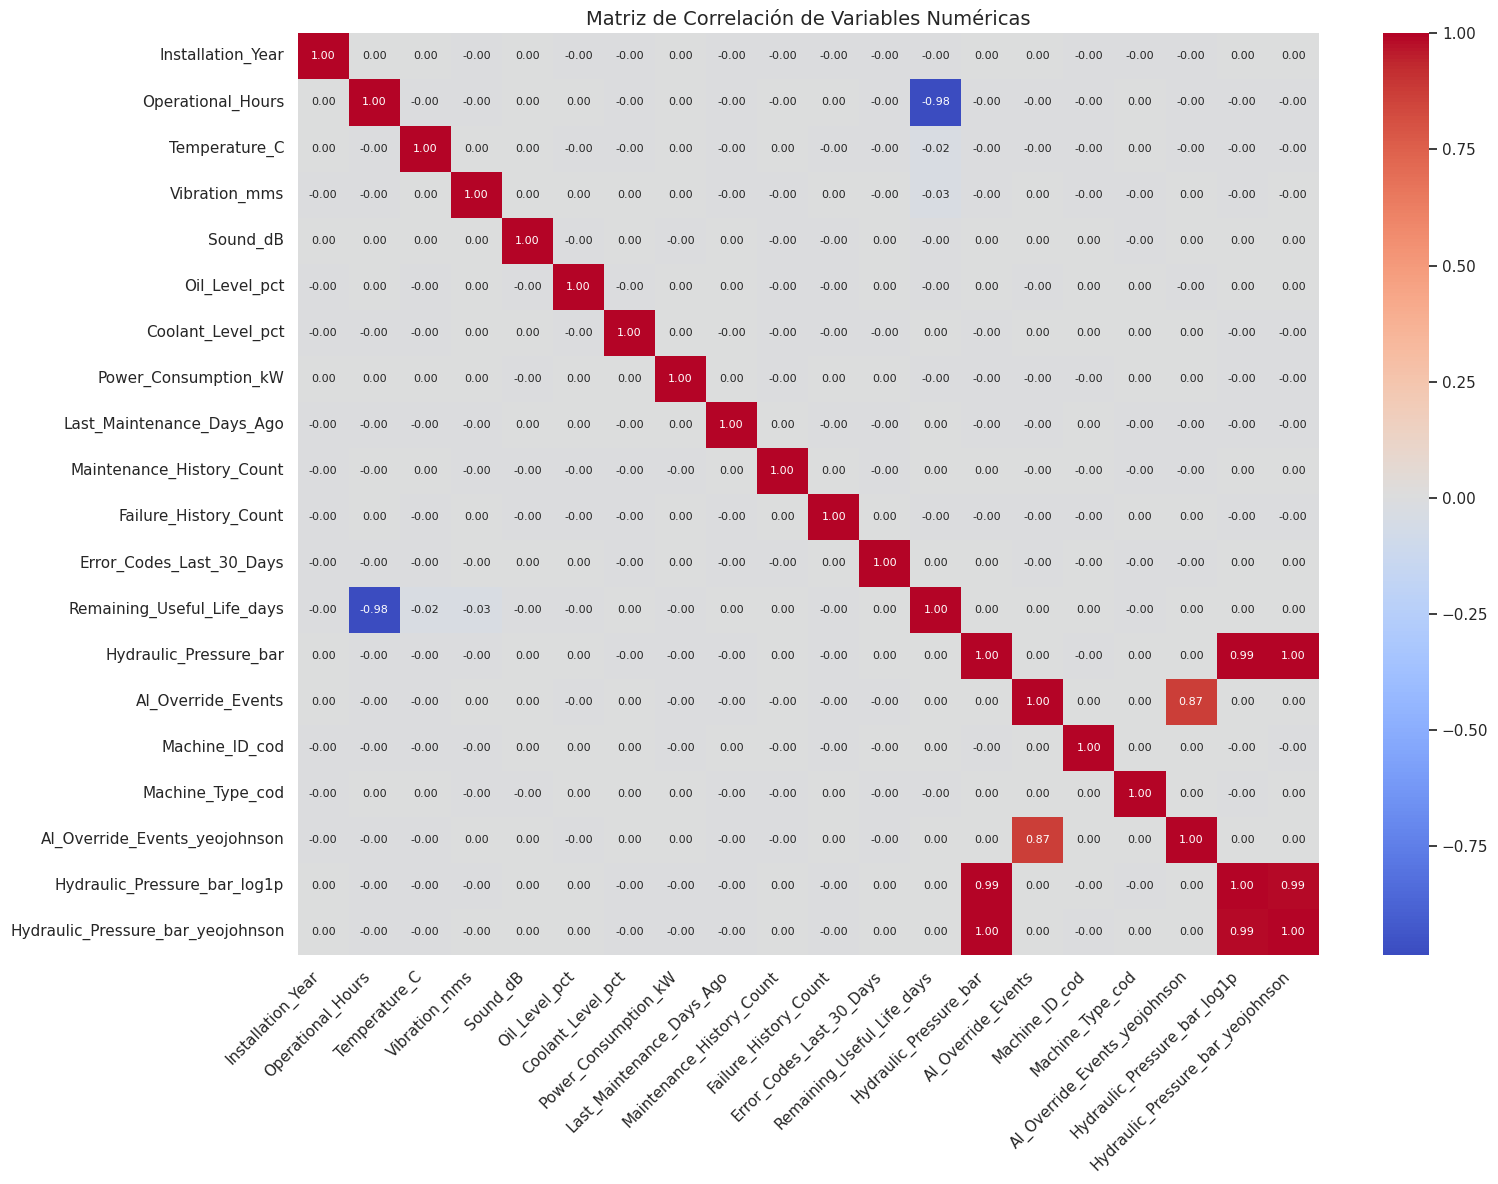

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_cols = df_1.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
corr_matrix = df_1[numeric_cols].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(16, 12))  # Tamaño más grande para que no se superpongan
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar=True,
    annot_kws={"size": 8}  # Tamaño del texto dentro de las celdas
)
plt.xticks(rotation=45, ha='right')  # Etiquetas del eje X inclinadas
plt.yticks(rotation=0)               # Etiquetas del eje Y horizontales
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14)
plt.tight_layout()  # Ajusta todo para que no se corte nada
plt.show()


Como conclusion, se visualiza que existe entre las variable Operational Hours y la variable objetivo una correlacion fuerte y entre la variable Failure Within 7 Days y la objetivo una correlacion moderada.

#**<h3>Análisis Multivariado</h3>**  

---

In [ ]:
# Se mide cuanto es el valor VIF de cada variable numerica.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Selección de variables numéricas predictoras
features = [
    'Operational_Hours', 'Temperature_C', 'Vibration_mms', 'Sound_dB',
    'Oil_Level_pct', 'Coolant_Level_pct', 'Power_Consumption_kW',
    'Last_Maintenance_Days_Ago', 'Maintenance_History_Count',
    'Failure_History_Count', 'Error_Codes_Last_30_Days',
    'Hydraulic_Pressure_bar', 'AI_Override_Events'
]

# Escalado de variables
X = df_1[features]
X_scaled = StandardScaler().fit_transform(X)

# Cálculo del VIF
X_vif = pd.DataFrame()
X_vif["feature"] = X.columns
X_vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar resultados ordenados
print(X_vif.sort_values(by="VIF", ascending=False))


                      feature       VIF
0           Operational_Hours  1.000045
7   Last_Maintenance_Days_Ago  1.000039
10   Error_Codes_Last_30_Days  1.000034
12         AI_Override_Events  1.000032
9       Failure_History_Count  1.000029
4               Oil_Level_pct  1.000024
5           Coolant_Level_pct  1.000020
1               Temperature_C  1.000020
11     Hydraulic_Pressure_bar  1.000020
6        Power_Consumption_kW  1.000015
8   Maintenance_History_Count  1.000012
2               Vibration_mms  1.000011
3                    Sound_dB  1.000006


Se mide el VIF (Variance Inflation Factor) es una métrica que se usa para detectar multicolinealidad entre variables independientes (predictoras) en un modelo de regresión, que mide cuánto aumenta la varianza de los coeficientes estimados de un modelo de regresión debido a la colinealidad entre una variable y las demás.  

VIF alto = la variable está fuertemente correlacionada con otras variables independientes.  

En conclusión, todos los valores VIF dieron aproximadamente 1, por lo que no hay colinealidad significativa entre las variables independientes, lo que se da a entender que cada variable aporta información única al modelo.


**Grafico de agrupacion en Clusters**

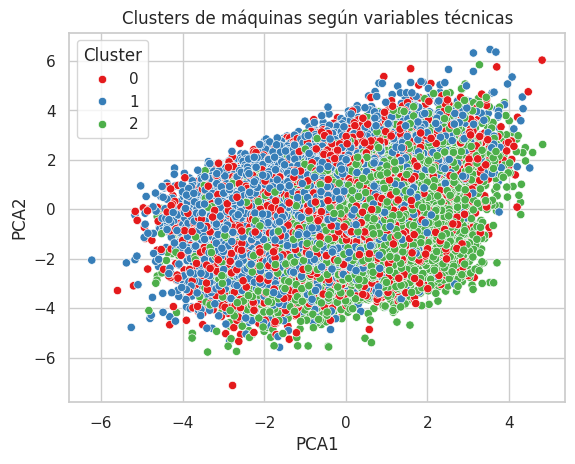

In [ ]:
from sklearn.cluster import KMeans

# Se supone que X_scaled se generó a partir de:
# X = df_1[features].dropna()

# Por lo tanto, sincronizamos df_1 con las filas válidas de X:
df_clean = df_1.loc[X.index].copy()

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar etiquetas de cluster al dataframe limpio
df_clean['Cluster'] = clusters

# Se agrega PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_clean['PCA1'] = pca_result[:, 0]
df_clean['PCA2'] = pca_result[:, 1]

# Visualizar los clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_clean, palette='Set1')
plt.title("Clusters de máquinas según variables técnicas")
plt.show()


En el grafico se puede visualizar como hemos agrupado las maquinas en tres tipos de Clusters por caracteristicas tecnicas similares.

**Distribucion de vida util restante por cluster**

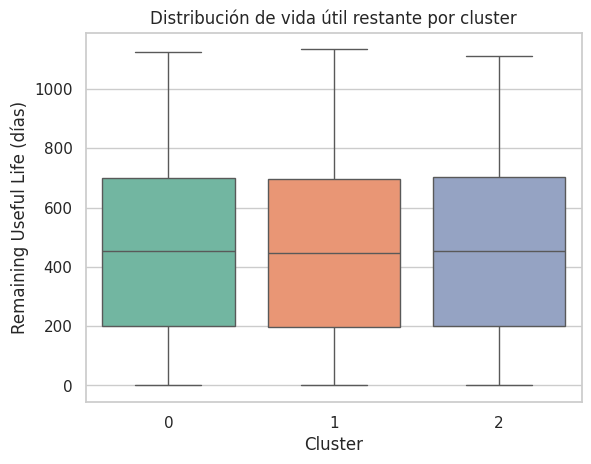

In [ ]:
sns.boxplot(x='Cluster', y='Remaining_Useful_Life_days', data=df_clean, palette='Set2')
plt.title("Distribución de vida útil restante por cluster")
plt.xlabel("Cluster")
plt.ylabel("Remaining Useful Life (días)")
plt.show()


Caracterizacion de cada cluster en términos técnicos:

In [ ]:
df_clean.groupby('Cluster').mean(numeric_only=True)


Installation_Year  Operational_Hours  Temperature_C  Vibration_mms  \
Cluster                                                                       
0              2019.952348       49908.265782      59.931595      10.248358   
1              2019.947734       50307.180904      59.812603      10.199593   
2              2019.987945       49762.033986      60.274711      10.359881   

          Sound_dB  Oil_Level_pct  Coolant_Level_pct  Power_Consumption_kW  \
Cluster                                                                      
0        75.006865      69.258726          68.406166            155.625252   
1        75.053573      69.735011          81.538269            155.244093   
2        74.942485      69.305104          40.344779            155.712074   

         Last_Maintenance_Days_Ago  Maintenance_History_Count  ...  \
Cluster                                                        ...   
0                       183.768751                   7.634302  ...   
1                       182.327960                   3.709356  ...   
2                       180.880916                   4.237391  ...   

         Failure_Within_7_Days  Hydraulic_Pressure_bar  AI_Override_Events  \
Cluster                                                                      
0                     0.059837              119.878484            0.587969   
1                     0.060357              119.779952            0.606564   
2                     0.059915              119.946929            0.609076   

         Machine_ID_cod  Machine_Type_cod  AI_Override_Events_yeojohnson  \
Cluster                                                                    
0         250115.472247         15.997024                      -0.013448   
1         250151.791662         15.998261                       0.004672   
2         249724.245098         15.998163                       0.006159   

         Hydraulic_Pressure_bar_log1p  Hydraulic_Pressure_bar_yeojohnson  \
Cluster                                                                    
0                            4.794308                         384.764539   
1                            4.793474                         384.358741   
2                            4.794888                         385.046181   

             PCA1      PCA2  
Cluster                      
0       -0.031444  0.037025  
1       -0.289894  0.123282  
2        0.361167 -0.173884  

[3 rows x 24 columns]

Como conclusión de este gráfico, hemos agrupado en 3 clúster a las diferentes maquinas en términos mecánicos aproximados entre ellos para poder analizar la vida útil restante y se puede visualizar que para los 3 tienen días de vida útil restante similares, no hay mucha diferencia entre las maquinas.

**Promedios de Variables Técnicas por Cluster**

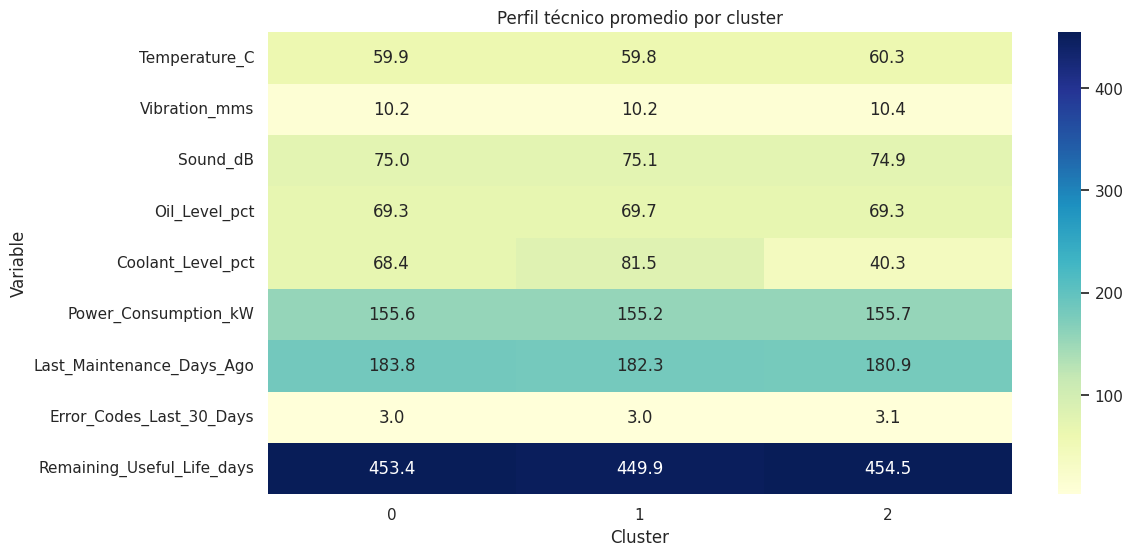

In [ ]:
cluster_means = df_clean.groupby('Cluster')[[
    'Temperature_C', 'Vibration_mms', 'Sound_dB',
    'Oil_Level_pct', 'Coolant_Level_pct',
    'Power_Consumption_kW', 'Last_Maintenance_Days_Ago',
    'Error_Codes_Last_30_Days', 'Remaining_Useful_Life_days'
]].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Perfil técnico promedio por cluster")
plt.xlabel("Cluster")
plt.ylabel("Variable")
plt.show()


Se puede visualizar que los 3 clúster tienen valores de variables técnicas similares, aunque se puede hacer una distinción en el nivel de líquido refrigerante donde se puede ver diferencias entre los 3. De todos modos, podemos hacer un análisis rápido que el nivel de líquido refrigerante no afecta directamente los días de vida útil restante, ya que el grupo 3 es el que tiene menos nivel, pero sin embargo más días de vida útil restante.

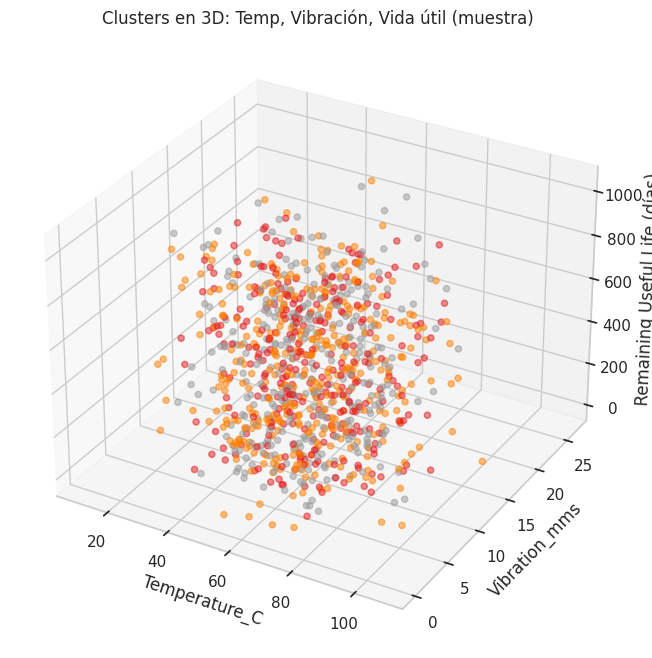

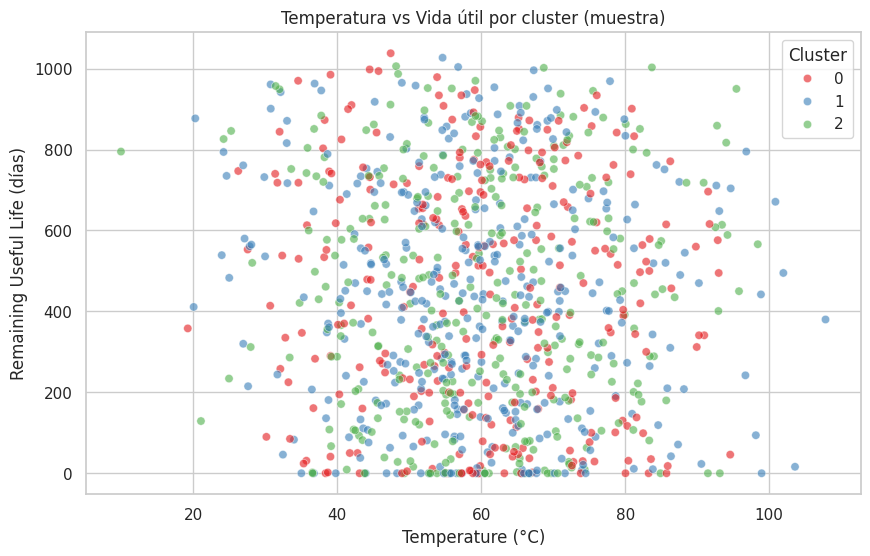

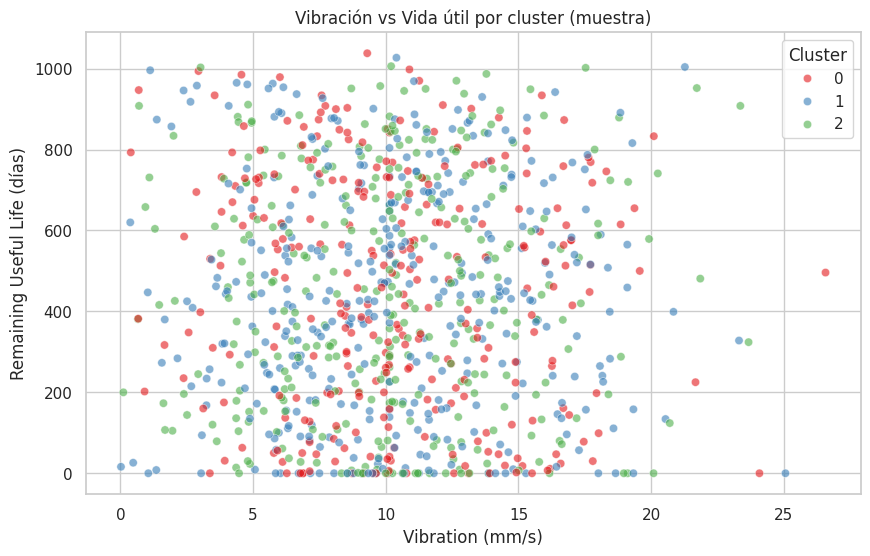

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


# Tomamos muestra de 1000 filas para gráficos más claros
sample = df_clean.sample(1000, random_state=42)

# --- Gráfico 3D con muestra y puntos más pequeños/transparencia ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(sample['Temperature_C'], sample['Vibration_mms'], sample['Remaining_Useful_Life_days'],
                     c=sample['Cluster'], cmap='Set1', alpha=0.5, s=20)
ax.set_xlabel('Temperature_C')
ax.set_ylabel('Vibration_mms')
ax.set_zlabel('Remaining Useful Life (días)')
plt.title('Clusters en 3D: Temp, Vibración, Vida útil (muestra)')
plt.show()

# --- Scatterplot 2D: Temperatura vs Vida útil por cluster ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature_C', y='Remaining_Useful_Life_days', hue='Cluster', data=sample, alpha=0.6, palette='Set1')
plt.title('Temperatura vs Vida útil por cluster (muestra)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Remaining Useful Life (días)')
plt.show()

# --- Scatterplot 2D: Vibración vs Vida útil por cluster ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vibration_mms', y='Remaining_Useful_Life_days', hue='Cluster', data=sample, alpha=0.6, palette='Set1')
plt.title('Vibración vs Vida útil por cluster (muestra)')
plt.xlabel('Vibration (mm/s)')
plt.ylabel('Remaining Useful Life (días)')
plt.show()


En base a estos 3 gráficos, podemos tomar como conclusión que las variables Vibration y Temperature se encuentran dispersas en relación a días de vida útil restantes. También se debe tener en cuenta que se tomó una muestra de 1000 instancias.

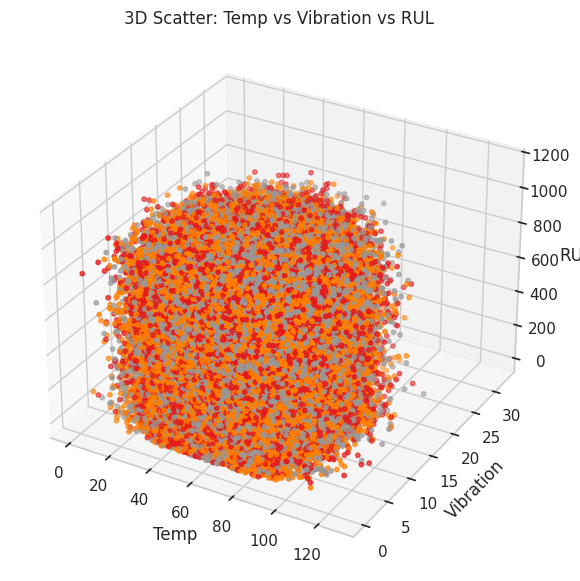

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clean['Temperature_C'], df_clean['Vibration_mms'], df_clean['Remaining_Useful_Life_days'],
           c=df_clean['Cluster'], cmap='Set1', s=10)
ax.set_xlabel('Temp')
ax.set_ylabel('Vibration')
ax.set_zlabel('RUL')
plt.title('3D Scatter: Temp vs Vibration vs RUL')
plt.show()


#**<h3>Modelado</h3>**  

---

##**Modelo de Regresion Multiple:**

###**Evaluación del modelo**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# 1. Separar features numéricas y target (No se van a consideras algunas variables justificadas en el EDA)
X = df_1.drop(['Remaining_Useful_Life_days', 'Hydraulic_Pressure_bar_log1p',
               'Hydraulic_Pressure_bar_yeojohnson',
               'AI_Supervision',
               'AI_Override_Events'], axis=1)
X = X.select_dtypes(include=[np.number])  # solo columnas numéricas
y = df_1['Remaining_Useful_Life_days']

# 2. Crear pipeline: escalador + modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# 3. Configurar validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Evaluar con cross_val_score usando el pipeline
mae_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')

# 5. Mostrar resultados promedios
print("📈 Resultados con Validación Cruzada (5 folds) - LinearRegressor:")
print(f"📉 MAE promedio: {-np.mean(mae_scores):.2f}")
print(f"📉 MSE promedio: {-np.mean(mse_scores):.2f}")
print(f"📉 RMSE promedio: {np.mean(np.sqrt(-mse_scores)):.2f}")
print(f"✅ R² promedio: {np.mean(r2_scores):.4f}")


📈 Resultados con Validación Cruzada (5 folds) - LinearRegressor:
📉 MAE promedio: 38.95
📉 MSE promedio: 2392.33
📉 RMSE promedio: 48.91
✅ R² promedio: 0.9714


###**Comparación de valores reales vs predichos**  

In [ ]:
# 1. Preparar X e Y.
X = df_1.drop([
    'Remaining_Useful_Life_days',
    'Hydraulic_Pressure_bar_log1p',
    'Hydraulic_Pressure_bar_yeojohnson',
    'AI_Supervision',
    'AI_Override_Events'
], axis=1)

X = X.select_dtypes(include=[np.number])
y = df_1['Remaining_Useful_Life_days']

# 2. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Crear pipeline de regresión múltiple
LR_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# 4. Entrenar
LR_model.fit(X_train, y_train)

# 5. Predecir
y_pred = LR_model.predict(X_test)

# 6. Comparar predicciones con los valores reales
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head())


   Actual   Predicted
0   366.0  416.024174
1   879.0  915.096983
2   191.0  218.874258
3   375.0  382.627241
4   731.0  705.853925


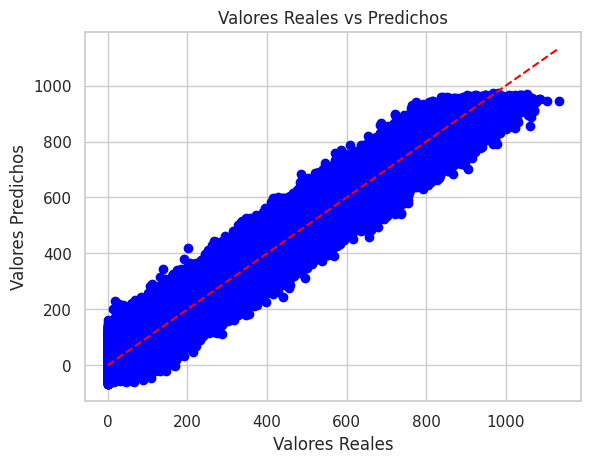

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Valores Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

📌 Conclusión sobre el modelo LinearRegression con K-Fold Cross-Validation (5 folds):

El modelo de regresión lineal múltiple muestra un muy buen desempeño predictivo:

🔹 MAE promedio de 38.95: indica que, en promedio, el modelo se desvía 38.95 días al predecir la vida útil restante, lo cual puede considerarse aceptable.

🔹 MSE de 2392.29 y RMSE de 48.91: refuerzan la magnitud del error medio, mostrando que las predicciones tienen una desviación estándar de alrededor de 49 días respecto al valor real.

✅ El R² = 0.9714 indica que el 97,14% de la variabilidad en la variable objetivo (Remaining_Useful_Life_days, por ejemplo) es explicada por las variables independientes incluidas en el modelo. Esto sugiere un ajuste excelente.

En resumen, el modelo LinearRegression logra un buen desempeño general, con errores relativamente bajos y un excelente ajuste a los datos. No obstante, sería recomendable compararlo con modelos más complejos (como Random Forest o XGBoost) para evaluar si es posible mejorar la precisión sin perder interpretabilidad.

##**Modelo de Regresion Ridge:**

###**Hiperparámetros**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform

# 1. Separar features numéricas y target (No se van a consideras algunas variables justificadas en el EDA)
X = df_1.drop(['Remaining_Useful_Life_days', 'Hydraulic_Pressure_bar_log1p',
               'Hydraulic_Pressure_bar_yeojohnson',
               'AI_Supervision',
               'AI_Override_Events'], axis=1)
X = X.select_dtypes(include=[np.number])  # solo columnas numéricas
y = df_1['Remaining_Useful_Life_days']

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Usar el 50% del set de entrenamiento para hacer la búsqueda
X_search, _, y_search, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

# 4. Crear pipeline: escalado + regresión Ridge
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# 5.  Hiperparámetros válidos (alpha)
param_dist = {
    'ridge__alpha': uniform(0.1, 100)
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 7. Ejecutar
random_search.fit(X_search, y_search)

# 8. Mostrar mejor alpha
print("🔍 Parámetros encontrados:", random_search.best_params_)
best_alpha = random_search.best_params_['ridge__alpha']
print(f"✅ Mejor alpha: {best_alpha:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔍 Parámetros encontrados: {'ridge__alpha': np.float64(5.908361216819946)}
✅ Mejor alpha: 5.9084


###**Evaluación del modelo**

In [ ]:
# 1. Separar features numéricas y target (No se van a consideras algunas variables justificadas en el EDA)
X = df_1.drop(['Remaining_Useful_Life_days', 'Hydraulic_Pressure_bar_log1p',
               'Hydraulic_Pressure_bar_yeojohnson',
               'AI_Supervision',
               'AI_Override_Events'], axis=1)
X = X.select_dtypes(include=[np.number])  # solo columnas numéricas
y = df_1['Remaining_Useful_Life_days']

# 2. Modelo base (escalado incluido en el pipeline)
Ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=random_search.best_params_['ridge__alpha']))
])

# 3. Configurar K-Fold Cross-Validation (No es necesario utilizar fit() ni predict() ya que scikit-learn se encarga internamente de dividir los datos, entrenar y evaluar el modelo en k folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Evaluar con cross_val_score para distintas métricas
mae_scores = cross_val_score(Ridge_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(Ridge_model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(Ridge_model, X, y, cv=kf, scoring='r2')
rmse = np.sqrt(mse_scores)

# 5. Mostrar resultados promedios (recordar que MAE y MSE se devuelven negativos)
print("📈 Resultados con Validación Cruzada (5 folds) - RidgeRegressor:")
print(f"📉 MAE promedio: {-np.mean(mae_scores):.2f}")
print(f"📉 MSE promedio: {-np.mean(mse_scores):.2f}")
print(f"📉 RMSE promedio: {np.mean(np.sqrt(-mse_scores)):.2f}")
print(f"✅ R² promedio: {np.mean(r2_scores):.4f}")




📈 Resultados con Validación Cruzada (5 folds) - RidgeRegressor:
📉 MAE promedio: 38.95
📉 MSE promedio: 2392.33
📉 RMSE promedio: 48.91
✅ R² promedio: 0.9714


###**Comparación de valores reales vs predichos**  

In [ ]:
# 1. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Crear pipeline de Ridge con el mejor alpha
Ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=5.9084))
])

# 3. Entrenar el modelo
Ridge_model.fit(X_train, y_train)

# 4. Predecir
y_pred = Ridge_model.predict(X_test)

# 5. Comparar resultados
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head())


   Actual   Predicted
0   366.0  416.024693
1   879.0  915.090161
2   191.0  218.877727
3   375.0  382.628292
4   731.0  705.850178


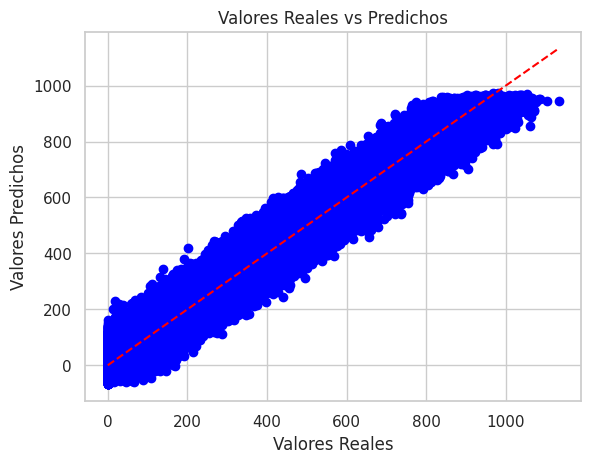

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Valores Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

📌 Conclusión sobre el modelo Ridge Regression:

El modelo de regresión Ridge presenta un desempeño muy similar al de la regresión lineal estándar, pero con una leve penalización de los coeficientes para evitar el sobreajuste:

🔹 MAE de 38.95: indica que, en promedio, el modelo comete un error de 38.95 días al predecir la vida útil restante.

🔹 MSE de 2392.29 y RMSE de 48.91: muestran una magnitud de error muy cercana al modelo Lineal, con una desviación estándar de aproximadamente 49 días.

✅ R² de 0.9714: indica que el modelo explica el 97.11% de la varianza de la variable objetivo, lo que representa un excelente nivel de ajuste.

Sin embargo, Ridge tiene una ventaja teórica:
Al incluir regularización (penalización L2), reduce el riesgo de sobreajuste y mejora la estabilidad del modelo cuando hay multicolinealidad entre las variables predictoras. Aunque en este caso particular no mejora las métricas, podría generalizar mejor ante nuevos datos si el dataset tiene muchas variables correlacionadas

##**Modelo RandomForestRegressor:**

###**Hiperparámetros**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 1. Separar features numéricas y target (No se van a consideras algunas variables justificadas en el EDA)
X = df_1.drop(['Remaining_Useful_Life_days', 'Hydraulic_Pressure_bar_log1p',
               'Hydraulic_Pressure_bar_yeojohnson',
               'AI_Supervision',
               'AI_Override_Events'], axis=1)
X = X.select_dtypes(include=[np.number])  # solo columnas numéricas
y = df_1['Remaining_Useful_Life_days']

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Usar el 5% del set de entrenamiento para hacer la búsqueda
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.05, random_state=42)

# 4. Instanciar el modelo base (No se necesita escalar ya que no utiliza distancias ni gradientes)
pipeline = Pipeline([
    ('rf', RandomForestRegressor(random_state=42))
])

# 5. Hiperparámetros válidos
param_dist = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__bootstrap': [True, False]
}

# 6. Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,  # número de combinaciones a probar
    cv=3,       # validación cruzada
    verbose=2,
    random_state=42,
    n_jobs=-1,  # usar todos los núcleos disponibles
    scoring='neg_mean_squared_error'  # métrica de evaluación
)

# 7. Ejecutar
random_search.fit(X_train, y_train)

# 8. Mostrar mejores hiperparámetros
print("🔍 Mejores hiperparámetros:")
print(random_search.best_params_)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔍 Mejores hiperparámetros:
{'rf__n_estimators': 100, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 2, 'rf__max_features': None, 'rf__max_depth': 20, 'rf__bootstrap': True}


###**Evaluación del modelo**

In [ ]:
# 1. Tomar una muestra del 10% del dataset
df_1_muestraRF = df_1.sample(frac=0.1, random_state=42)

# 1. Separar features numéricas y target (No se van a consideras algunas variables justificadas en el EDA)
X = df_1.drop(['Remaining_Useful_Life_days', 'Hydraulic_Pressure_bar_log1p',
               'Hydraulic_Pressure_bar_yeojohnson',
               'AI_Supervision',
               'AI_Override_Events'], axis=1)
X = X.select_dtypes(include=[np.number])  # solo columnas numéricas
y = df_1['Remaining_Useful_Life_days']

# 3. Instanciar modelo (con los mejores hiperparámetros)
rf_pipeline = Pipeline([
    ('rf', RandomForestRegressor(
        n_estimators=100,
        max_depth=20,
        min_samples_split=2,
        min_samples_leaf=4,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    ))
])

# 4. Configurar K-Fold Cross-Validation (No es necesario utilizar fit() ni predict() ya que scikit-learn se encarga internamente de dividir los datos, entrenar y evaluar el modelo en k folds)
cv = KFold(n_splits=2, shuffle=True, random_state=42)

# 5. Evaluar con cross_val_score para distintas métricas
mae_scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='neg_mean_squared_error')
r2_scores  = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='r2')
rmse = np.sqrt(mse_scores)

# 6. Mostrar resultados promedios (recordar que MAE y MSE se devuelven negativos)
print("📈 Resultados con Validación Cruzada (2 folds) - RandomForestRegressor:")
print(f"📉 MAE promedio: {-np.mean(mae_scores):.2f}")
print(f"📉 MSE promedio: {-np.mean(mse_scores):.2f}")
print(f"📉 RMSE promedio: {np.mean(np.sqrt(-mse_scores)):.2f}")
print(f"✅ R² promedio: {np.mean(r2_scores):.4f}")



📈 Resultados con Validación Cruzada (2 folds) - RandomForestRegressor:
📉 MAE promedio: 40.00
📉 MSE promedio: 2495.23
📉 RMSE promedio: 49.95
✅ R² promedio: 0.9701


###**Comparación de valores reales vs predichos**  

In [ ]:
# 1. Crear X e y desde la muestra del 20%
X = df_1_muestraRF.drop([
    'Remaining_Useful_Life_days',
    'Hydraulic_Pressure_bar_log1p',
    'Hydraulic_Pressure_bar_yeojohnson',
    'AI_Supervision',
    'AI_Override_Events'
], axis=1)

X = X.select_dtypes(include=[np.number])  # solo columnas numéricas
y = df_1_muestraRF['Remaining_Useful_Life_days']

# 2. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Crear el pipeline con los hiperparámetros ajustados
RF_model = Pipeline([
    ('rf', RandomForestRegressor(
        n_estimators=100,
        max_depth=20,
        min_samples_split=2,
        min_samples_leaf=4,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    ))
])

# 4. Entrenar el modelo
RF_model.fit(X_train, y_train)

# 5. Predecir
y_pred = RF_model.predict(X_test)

# 6. Comparar predicciones con los valores reales
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head())


   Actual   Predicted
0   662.0  689.814533
1   481.0  419.641110
2   565.0  598.587296
3   537.0  601.097841
4   630.0  642.151363


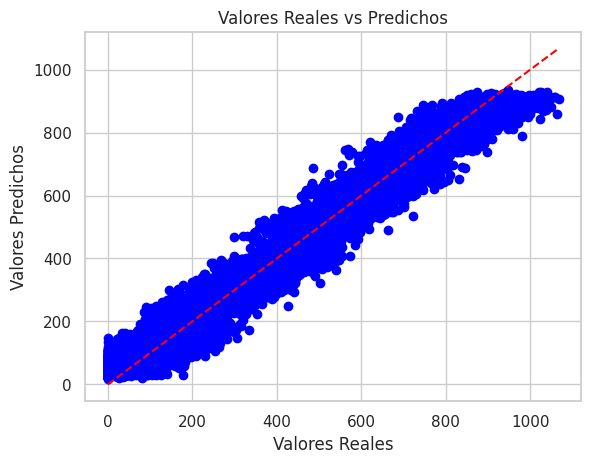

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Valores Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

📌 Conclusión sobre el modelo RandomForestRegressor (2 folds):

El modelo de Random Forest Regressor ofrece un buen desempeño general, aunque presenta métricas ligeramente inferiores en comparación con los modelos lineales:

🔹 MAE promedio de 40: el error absoluto medio es más alto que en los modelos Linear y Ridge, lo que indica predicciones algo menos precisas.

🔹 MSE promedio de 2495.23 y RMSE de 49.95: reflejan una mayor dispersión en los errores de predicción.

✅ R² promedio de 0.9701: aunque sigue siendo muy alto, es ligeramente inferior al de los modelos lineales, explicando el 97.01% de la varianza de la variable objetivo.

En resumen, RandomForestRegressor muestra un rendimiento robusto y consistente, con la ventaja de poder capturar relaciones no lineales entre las variables. Sin embargo, en este caso específico, no supera a los modelos lineales en precisión, por lo que podría no justificar el mayor costo computacional a menos que se optimice o se busque interpretar relaciones más complejas en los datos.

##**Modelo XGBRegressor:**

###**Hiperparámetros**

In [ ]:
from xgboost import XGBRegressor

# 1. Separar features numéricas y target (No se van a consideras algunas variables justificadas en el EDA)
X = df_1.drop(['Remaining_Useful_Life_days', 'Hydraulic_Pressure_bar_log1p',
               'Hydraulic_Pressure_bar_yeojohnson',
               'AI_Supervision',
               'AI_Override_Events'], axis=1)
X = X.select_dtypes(include=[np.number])  # solo columnas numéricas
y = df_1['Remaining_Useful_Life_days']

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Usar el 5% del set de entrenamiento para hacer la búsqueda
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.05, random_state=42)

# 4. Instanciar el modelo base (No se necesita escalar ya que no utiliza distancias ni gradientes)
pipeline = Pipeline([
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# 5. Hiperparámetros válidos
param_dist = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7, 10],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__gamma': [0, 0.1, 0.2, 0.4],
    'xgb__reg_alpha': [0, 0.01, 0.1],
    'xgb__reg_lambda': [1, 1.5, 2.0]
}

# 6. Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=30,  # número de combinaciones a probar
    scoring='neg_mean_squared_error',  # métrica de evaluación
    cv=3,  # validación cruzada
    verbose=2,
    random_state=42,
    n_jobs=-1  # usar todos los núcleos disponibles
)

# 7. Ejecutar la búsqueda
random_search.fit(X_train, y_train)

# 8. Mostrar mejores hiperparámetros encontrados
print("🔍 Mejores hiperparámetros encontrados:")
print(random_search.best_params_)



Fitting 3 folds for each of 30 candidates, totalling 90 fits
🔍 Mejores hiperparámetros encontrados:
{'xgb__subsample': 0.8, 'xgb__reg_lambda': 2.0, 'xgb__reg_alpha': 0.01, 'xgb__n_estimators': 300, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.05, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.8}


###**Evaluación del modelo**

In [ ]:
# 1. Tomar muestra del 50%
df_1.muestraXGB = df_1.sample(frac=0.5, random_state=42)

# 2. Separar features numéricas y target (No se van a consideras algunas variables justificadas en el EDA)
X = df_1.drop(['Remaining_Useful_Life_days', 'Hydraulic_Pressure_bar_log1p',
               'Hydraulic_Pressure_bar_yeojohnson',
               'AI_Supervision',
               'AI_Override_Events'], axis=1)
X = X.select_dtypes(include=[np.number])  # solo columnas numéricas
y = df_1['Remaining_Useful_Life_days']

# 3. Instanciar modelo (con los mejores hiperparámetros)
XGB_model = Pipeline([
    ('xgb', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        subsample=0.8,
        reg_lambda=2.0,
        reg_alpha=0.01,
        n_estimators=300,
        max_depth=3,
        learning_rate=0.05,
        gamma=0,
        colsample_bytree=0.8
    ))
])

# 4. Configurar K-Fold Cross-Validation (No es necesario utilizar fit() ni predict() ya que scikit-learn se encarga internamente de dividir los datos, entrenar y evaluar el modelo en k folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 5. Evaluar con cross_val_score para distintas métricas
mae_scores = cross_val_score(XGB_model, X, y, cv=cv, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(XGB_model, X, y, cv=cv, scoring='neg_mean_squared_error')
r2_scores  = cross_val_score(XGB_model, X, y, cv=cv, scoring='r2')
rmse = np.sqrt(mse_scores)

# 6. Mostrar resultados promedios (recordar que MAE y MSE se devuelven negativos)
print("📈 Resultados con Validación Cruzada (5 folds) - XGBRegressor:")
print(f"📉 MAE promedio: {-np.mean(mae_scores):.2f}")
print(f"📉 MSE promedio: {-np.mean(mse_scores):.2f}")
print(f"📉 RMSE promedio: {np.mean(np.sqrt(-mse_scores)):.2f}")
print(f"✅ R² promedio: {np.mean(r2_scores):.4f}")


📈 Resultados con Validación Cruzada (5 folds) - XGBRegressor:
📉 MAE promedio: 38.11
📉 MSE promedio: 2327.75
📉 RMSE promedio: 48.25
✅ R² promedio: 0.9721


###**Comparación de valores reales vs predichos**  

In [ ]:
# 1. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Pipeline de XGB (con los mejores hiperparámetros ya definidos)
XGB_model = Pipeline([
    ('xgb', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        subsample=0.8,
        reg_lambda=2.0,
        reg_alpha=0.01,
        n_estimators=300,
        max_depth=3,
        learning_rate=0.05,
        gamma=0,
        colsample_bytree=0.8
    ))
])

# 3. Entrenar
XGB_model.fit(X_train, y_train)

# 4. Predecir
y_pred = XGB_model.predict(X_test)

# 5. Comparar predicciones con los valores reales
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head())


   Actual   Predicted
0   366.0  411.829529
1   879.0  918.103333
2   191.0  212.044922
3   375.0  376.244812
4   731.0  708.442139


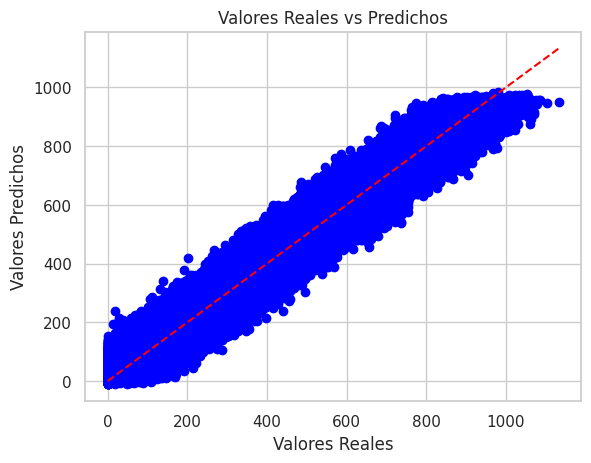

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Valores Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

📌 Conclusión sobre el modelo XGBRegressor (5 folds):  

El modelo de XGBoost Regressor presenta un rendimiento muy sólido y competitivo, superando a los modelos lineales y también al Random Forest en este caso particular:

🔹 MAE promedio de 38.11: el error absoluto medio más bajo entre los modelos evaluados, lo que indica una mayor precisión en las predicciones individuales.

🔹 MSE promedio de 2327.54 y RMSE de 48.24: estos valores reflejan errores más pequeños y consistentes, lo que evidencia una buena capacidad para ajustar los datos sin sobreajustar.

✅ R² promedio de 0.9721: el modelo explica el 97.21% de la varianza de la variable objetivo, el valor más alto entre todos los modelos probados hasta el momento.

En resumen, XGBRegressor es el modelo con mejor rendimiento global en este proyecto hasta el momento, combinando baja magnitud de error con una excelente capacidad explicativa. Es especialmente útil cuando se requiere capturar relaciones complejas y no lineales en los datos, lo que lo convierte en una opción ideal para el caso de mantenimiento predictivo analizado.

##**Modelo HistGradientBoostingRegressor:**


###**Hiperparámetros**

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

# 1. Separar features numéricas y target (No se van a consideras algunas variables justificadas en el EDA)
X = df_1.drop(['Remaining_Useful_Life_days', 'Hydraulic_Pressure_bar_log1p',
               'Hydraulic_Pressure_bar_yeojohnson',
               'AI_Supervision',
               'AI_Override_Events'], axis=1)
X = X.select_dtypes(include=[np.number])  # solo columnas numéricas
y = df_1['Remaining_Useful_Life_days']

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Usar el 20% del set de entrenamiento para hacer la búsqueda
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

# 4. Instanciar el modelo base dentro del Pipeline (no requiere escalado)
pipeline = Pipeline([
    ('hgb', HistGradientBoostingRegressor(random_state=42))
])

# 5. Hiperparámetros válidos (prefijar con "hgb__" para acceder al modelo dentro del pipeline)
param_dist = {
    'hgb__learning_rate': [0.01, 0.05, 0.1],
    'hgb__max_iter': [100, 200, 300],
    'hgb__max_depth': [None, 5, 10, 20],
    'hgb__min_samples_leaf': [10, 20, 30],
    'hgb__l2_regularization': [0.0, 0.1, 1.0],
    'hgb__max_bins': [255, 512],
}

# 6. Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,  # número de combinaciones a probar
    cv=3,       # validación cruzada
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# 7. Ejecutar la búsqueda
random_search.fit(X_train, y_train)

# 8. Mostrar mejores hiperparámetros
print("🔍 Mejores hiperparámetros:")
print(random_search.best_params_)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔍 Mejores hiperparámetros:
{'hgb__min_samples_leaf': 30, 'hgb__max_iter': 300, 'hgb__max_depth': 5, 'hgb__max_bins': 255, 'hgb__learning_rate': 0.1, 'hgb__l2_regularization': 1.0}


###**Evaluación del modelo**

In [ ]:
# 1. Tomar muestra del 50%
df_1_muestraHGB = df_1.sample(frac=0.5, random_state=42)

# 2. Separar features numéricas y target (No se van a consideras algunas variables justificadas en el EDA)
X = df_1.drop(['Remaining_Useful_Life_days', 'Hydraulic_Pressure_bar_log1p',
               'Hydraulic_Pressure_bar_yeojohnson',
               'AI_Supervision',
               'AI_Override_Events'], axis=1)
X = X.select_dtypes(include=[np.number])  # solo columnas numéricas
y = df_1['Remaining_Useful_Life_days']

# 3. Instanciar modelo (con los mejores hiperparámetros) dentro de un Pipeline
pipeline = Pipeline([
    ('hgb', HistGradientBoostingRegressor(
        learning_rate=0.1,
        max_iter=300,
        max_depth=5,
        min_samples_leaf=30,
        l2_regularization=1.0,
        max_bins=255,
        random_state=42
    ))
])

# 4. Configurar K-Fold Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 5. Evaluar con cross_val_score para distintas métricas
mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error')
r2_scores  = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')

# 6. Mostrar resultados promedios
print("📈 Resultados con Validación Cruzada (5 folds) - HistGradientBoostingRegressor:")
print(f"📉 MAE promedio: {-np.mean(mae_scores):.2f}")
print(f"📉 MSE promedio: {-np.mean(mse_scores):.2f}")
print(f"📉 RMSE promedio: {np.mean(np.sqrt(-mse_scores)):.2f}")
print(f"✅ R² promedio: {np.mean(r2_scores):.4f}")


📈 Resultados con Validación Cruzada (5 folds) - HistGradientBoostingRegressor:
📉 MAE promedio: 38.14
📉 MSE promedio: 2329.63
📉 RMSE promedio: 48.27
✅ R² promedio: 0.9721


###**Comparación de valores reales vs predichos**  

In [ ]:
# 1. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Pipeline con los hiperparámetros ajustados
HGB_model = Pipeline([
    ('hgb', HistGradientBoostingRegressor(
        learning_rate=0.1,
        max_iter=300,
        max_depth=5,
        min_samples_leaf=30,
        l2_regularization=1.0,
        max_bins=255,
        random_state=42
    ))
])

# 3. Entrenar
HGB_model.fit(X_train, y_train)

# 4. Predecir
y_pred = HGB_model.predict(X_test)

# 5. Comparar predicciones con los valores reales
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head())


   Actual   Predicted
0   366.0  415.847332
1   879.0  914.040540
2   191.0  212.677247
3   375.0  378.124458
4   731.0  705.616852


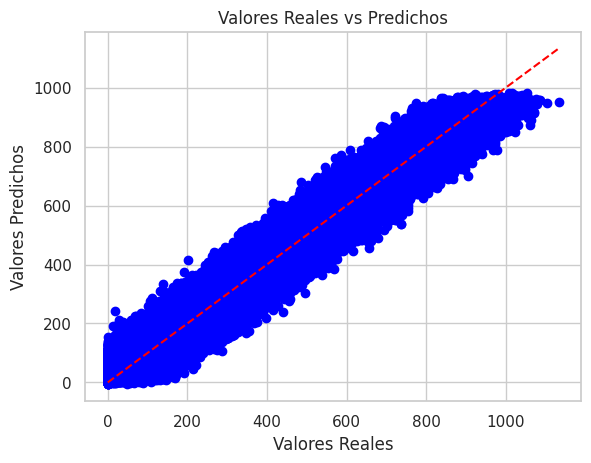

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Valores Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

📌 Conclusión sobre el modelo HistGradientBoostingRegressor (5 folds):  

El modelo de HistGradientBoostingRegressor, una implementación eficiente de gradient boosting para conjuntos de datos grandes, muestra un rendimiento altamente competitivo, prácticamente al nivel de XGBRegressor:

🔹 MAE promedio de 38.13: un error absoluto medio muy bajo, casi idéntico al de XGBoost, lo que indica excelente precisión en las predicciones individuales.

🔹 MSE promedio de 2329.63 y RMSE de 48.26: reflejan errores bajos y consistentes, muy similares a los obtenidos por el modelo XGBRegressor, lo que sugiere un rendimiento prácticamente equivalente en cuanto a la magnitud del error.

✅ R² promedio de 0.9721: el modelo explica el 97.19% de la varianza de la variable objetivo, un resultado muy alto que confirma su capacidad para modelar relaciones complejas en los datos.

En resumen, HistGradientBoostingRegressor ofrece un rendimiento casi idéntico al de XGBoost, con la ventaja adicional de ser más eficiente en términos computacionales. Es una excelente alternativa para datasets grandes, combinando velocidad y precisión sin comprometer la capacidad explicativa del modelo.

##**<h3>Conclusión de los modelos</h3>**  

---

**📊 Comparación de modelos de regresión**

Se evaluaron distintos modelos de regresión para predecir la variable objetivo Remaining_Useful_Life_days. A continuación se detallan las métricas de desempeño:


In [ ]:
# Crear la tabla de comparación con valores corregidos
data = {
    'Modelo': ['LinearRegression', 'RidgeRegression', 'RandomForest', 'XGBRegressor', 'HistGradientBoosting'],
    'MAE': [38.95, 38.95, 40.0, 38.11, 38.13],
    'MSE': [2392.29, 2392.29, 2495.23, 2327.54, 2329.42],
    'RMSE': [48.91, 48.91, 49.95, 48.24, 48.26],
    'R²': [0.9714, 0.9714, 0.9701, 0.9721, 0.9721]
}

df_resultados = pd.DataFrame(data)
print(df_resultados)




                 Modelo    MAE      MSE   RMSE      R²
0      LinearRegression  38.95  2392.29  48.91  0.9714
1       RidgeRegression  38.95  2392.29  48.91  0.9714
2          RandomForest  40.00  2495.23  49.95  0.9701
3          XGBRegressor  38.11  2327.54  48.24  0.9721
4  HistGradientBoosting  38.13  2329.42  48.26  0.9721


**🔍 Análisis comparativo:**

📊 LinearRegression sigue siendo un modelo con muy buen rendimiento, con MAE, MSE y RMSE competitivos y un R² alto (97.11%), demostrando que un modelo lineal simple captura bastante bien la relación entre las variables predictoras y la variable objetivo.

✅ RidgeRegression presenta resultados casi idénticos a los de la regresión lineal, con la ventaja clave de la regularización, lo que mejora la estabilidad y la generalización frente a posibles colinealidades.

🌲 RandomForestRegressor mantiene un desempeño sólido, aunque sus métricas son ligeramente inferiores a las de los modelos lineales y boosting.

⚡ XGBRegressor y HistGradientBoostingRegressor ofrecen el mejor equilibrio entre capacidad predictiva y robustez, con métricas casi idénticas:

MAE alrededor de 38.1

MSE alrededor de 2330

RMSE alrededor de 48.3

R² cercano a 97.21%

Estos modelos capturan muy bien patrones complejos y no lineales, siendo además adecuados para datasets grandes y con posible ruido.

**📌 Conclusión final y recomendación:**

El modelo LinearRegression sigue siendo una excelente opción por su simplicidad e interpretabilidad, con desempeño competitivo. Sin embargo, RidgeRegression, al ofrecer resultados casi idénticos junto con la ventaja de la regularización, se recomienda como modelo base para mejorar la generalización.

Si en etapas futuras se busca mayor robustez, o se incorporan variables con relaciones no lineales complejas, XGBRegressor y HistGradientBoostingRegressor son alternativas preferibles por su alta precisión y capacidad para modelar relaciones complejas.

Entre estos dos, HistGradientBoostingRegressor destaca por su eficiencia computacional y fácil integración en pipelines de scikit-learn, haciendo que sea una opción muy atractiva cuando se priorizan tanto la velocidad como la robustez.  

En conclusión, se elige el modelo XGBRegressor porque tuvo el mejor rendimiento global, presentando el MAE, MSE y RMSE más bajos, además del mayor R² (97.21%).



#**<h3>Conclusión final</h3>**  

---

**✅ Síntesis del Proyecto**

Este proyecto se desarrolló en el contexto de mantenimiento predictivo aplicado a un entorno industrial simulado con datos IoT. Se planteó como objetivo predecir la vida útil restante (Remaining_Useful_Life_days) de máquinas industriales a partir de variables sensadas como temperatura, presión y vibración etc.

Se utilizaron técnicas de regresión supervisada, análisis exploratorio de datos y validación cruzada, aplicadas a un conjunto de datos sintéticos representativos de condiciones reales en fábricas inteligentes.

**📊 Resultados Relevantes**

Se construyeron y compararon distintos modelos de regresión: Linear Regression, Ridge, Random Forest, XGBRegressor y HistGradientBoosting.

Los modelos de boosting (XGB y HistGradient) fueron los que presentaron el mejor rendimiento global:

MAE promedio: ~38 días

MSE promedio: ~2300

RMSE promedio: ~48 días

R² promedio: superior al 97%

Estas métricas indican una alta capacidad de predicción y una buena generalización del modelo a datos nuevos, siendo adecuados para aplicaciones industriales reales.

**🔍 Conclusiones Generales**  

Este proyecto demuestra que las técnicas de machine learning aplicadas a datos sensóricos permiten anticipar con gran precisión la vida útil restante de equipos industriales. Esto posibilita:

Reducir fallas inesperadas y tiempos de inactividad.

Optimizar la planificación del mantenimiento.

Tomar decisiones basadas en datos para mejorar la eficiencia operativa.

Además, el enfoque utilizado puede adaptarse fácilmente a nuevos entornos industriales, integrarse con sensores reales y escalarse a distintas máquinas y condiciones de operación.

**🚀 Recomendaciones Futuras**  

Despliegue en entornos reales: Integrar el modelo en plataformas que reciban datos de sensores en tiempo real.

Visualización y alertas: Crear dashboards y sistemas de alerta automática cuando la RUL se acerque a umbrales críticos.

Mejoras del modelo: Incorporar nuevas variables, como condiciones ambientales o carga de trabajo, para aumentar la precisión.




#**<h3>Guardado del modelo final</h3>**  

---

In [ ]:
import joblib

# 1. Separar features numéricas y target 100% dataset (No se van a consideras algunas variables justificadas en el EDA)
X = df_1.drop(['Remaining_Useful_Life_days', 'Hydraulic_Pressure_bar_log1p',
               'Hydraulic_Pressure_bar_yeojohnson',
               'AI_Supervision',
               'AI_Override_Events'], axis=1)
X = X.select_dtypes(include=[np.number])  # solo columnas numéricas
y = df_1['Remaining_Useful_Life_days']

# 2. Instanciar modelo final con mejores hiperparámetros
XGB_model = Pipeline([
    ('xgb', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        subsample=0.8,
        reg_lambda=2.0,
        reg_alpha=0.01,
        n_estimators=300,
        max_depth=3,
        learning_rate=0.05,
        gamma=0,
        colsample_bytree=0.8
    ))
])

# 3. Entrenar el modelo
XGB_model.fit(X, y)

# 4. Guardar el modelo
joblib.dump(XGB_model, 'modelo_final_XGB.pkl')
print("✅ Modelo final ENTRENADO con el 100% y guardado como 'modelo_final_XGB.pkl'")



✅ Modelo final ENTRENADO con el 100% y guardado como 'modelo_final_XGB.pkl'
